In [2]:

import os
import time
import numpy as np
import pandas as pd

from radar.dataparsing.sentool_td_textdata_parser import read_columns

runNumber = 6
directory_to_process = f"data/radar/run{runNumber}-TD"
c = 3e8  # Speed of light (m/s)
f_c = 24.375e9
td_data = []
TIME_STEP = 0.241
WAVELENGTH = 0.01233714

def process_data_from_folder(self):
        
        # List all files in the directory
        files = os.listdir(directory_to_process)
        
        # Filter the files based on the naming convention
        txt_files = [f for f in files if f.startswith('trial') and f.endswith('.txt')]
        
        # Sort the files if needed (optional)
        txt_files.sort()
        
        # Process each file one by one
        for file_name in txt_files:
            file_path = os.path.join(directory_to_process, file_name)
            # print(f"Processing file: {file_path}")
            new_fd_data = read_columns(file_path)
            td_data.append(new_fd_data.td_data)

In [3]:
process_data_from_folder(directory_to_process)
td_data = np.array(td_data)
I1_data = td_data[:, :, 0]  # Extract the I1 signal, which is the first column across all frames and range bins  # Extract the first column, which corresponds to I1

print(td_data.shape[0])

224


In [4]:
import matplotlib.pyplot as plt
import numpy as np

def plot_I1_Q1(td_data, sample_index=0):
    """
    Plots the I1 and Q1 signal's voltage for the specified sample index.
    
    Parameters:
    td_data (np.array): 3D numpy array of shape (224, 1024, 4)
                        where the last dimension represents [I1, Q1, I2, Q2] signals.
    sample_index (int): The index of the sample to plot.
    
    Returns:
    None
    """
    # Extracting I1 and Q1 signals
    I1 = td_data[sample_index, :, 0]  # I1 signal
    Q1 = td_data[sample_index, :, 1]  # Q1 signal
    
    # I1 = td_data[:, sample_index, 0]  # I1 signal - over 1 "bin"
    # Q1 = td_data[:, sample_index, 1]  # Q1 signal - over 1 "bin"
    
    # Create a time array based on the number of samples (1024)
    time_array = np.linspace(0, len(I1), len(I1))
    
    # Plot the I1 signal
    plt.figure(figsize=(10, 6))
    
    plt.subplot(2, 1, 1)
    plt.plot(time_array, I1, label="I1 Signal", color="blue")
    plt.title(f"I1 Signal for Sample {sample_index}")
    plt.xlabel("Time (arbitrary units)")
    plt.ylabel("Voltage (V)")
    plt.grid(True)
    
    # Plot the Q1 signal
    plt.subplot(2, 1, 2)
    plt.plot(time_array, Q1, label="Q1 Signal", color="green")
    plt.title(f"Q1 Signal for Sample {sample_index}")
    plt.xlabel("Time (arbitrary units)")
    plt.ylabel("Voltage (V)")
    plt.grid(True)
    
    # Display the plots
    plt.tight_layout()
    plt.show()



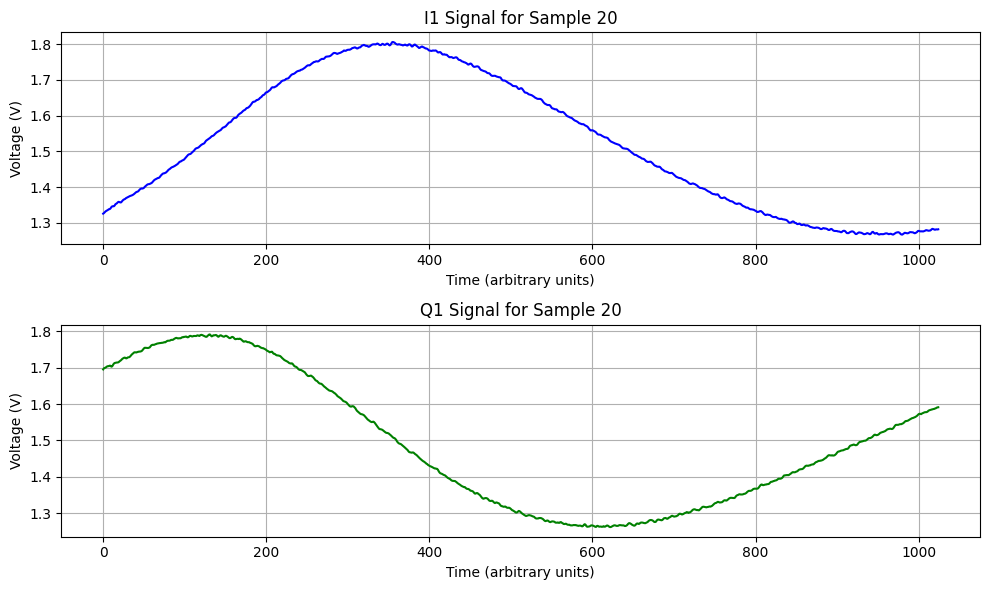

In [5]:

# Example usage (replace 'td_data' with your actual data):
plot_I1_Q1(td_data, sample_index=20) # are up to 0-223 samples for FD6

In [6]:
import numpy as np
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt

# Define a function to plot the signal amplitude (in dB) after performing Range FFT with separate subplots for I1 and Q1
def plot_range_fft_amplitude_subplots(td_data, time_index, range_resolution=0.199861):
    """
    Plots the amplitude (in dB) of the I1 and Q1 signals after performing Range FFT for a specific time index.
    I1 and Q1 are plotted in separate subplots.
    
    Parameters:
    td_data (numpy array): 3D array of shape (time_samples, range_bins, signals), e.g., (224, 1024, 4).
    time_index (int): The time index (chirp) for which to plot the FFT.
    range_resolution (float): Resolution in meters (default is 0.199861 meters).
    
    Returns:
    None: Displays the range vs amplitude plots in dB for I1 and Q1 in separate subplots.
    """
    Nr = td_data.shape[1]  # Number of range bins (1024)
    
    # Extract the I1 and Q1 signals for the specific time index
    I1_signal = td_data[time_index, :, 0]  # I1 signal
    Q1_signal = td_data[time_index, :, 1]  # Q1 signal
    
    # Perform Range FFT for both I1 and Q1 signals
    I1_fft = np.fft.fft(I1_signal, Nr)
    Q1_fft = np.fft.fft(Q1_signal, Nr)
    
    # Calculate amplitude (magnitude) for both signals
    I1_amplitude = np.abs(I1_fft[:Nr//2])
    Q1_amplitude = np.abs(Q1_fft[:Nr//2])
    
    # Convert to dB scale
    I1_amplitude_db = 20 * np.log10(I1_amplitude)
    Q1_amplitude_db = 20 * np.log10(Q1_amplitude)
    
    # Define range axis
    max_range = range_resolution * Nr  # Maximum range
    range_axis = np.linspace(0, max_range/2, Nr//2)  # First half of the FFT
    
    # Create subplots for I1 and Q1 signals
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))
    
    # Plot Range vs Amplitude in dB for I1 signal
    ax1.plot(range_axis, I1_amplitude_db, label='I1 Amplitude (dB)', color='blue')
    ax1.set_title(f'I1: Range vs Amplitude (Time Index {time_index})')
    ax1.set_xlabel('Range (m)')
    ax1.set_ylabel('Amplitude (dB)')
    ax1.grid(True)
    
    # Plot Range vs Amplitude in dB for Q1 signal
    ax2.plot(range_axis, Q1_amplitude_db, label='Q1 Amplitude (dB)', color='green')
    ax2.set_title(f'Q1: Range vs Amplitude (Time Index {time_index})')
    ax2.set_xlabel('Range (m)')
    ax2.set_ylabel('Amplitude (dB)')
    ax2.grid(True)
    
    # Adjust the layout and show the plots
    plt.tight_layout()
    plt.show()

# Example usage:
plot_range_fft_amplitude_subplots(td_data, time_index=50)


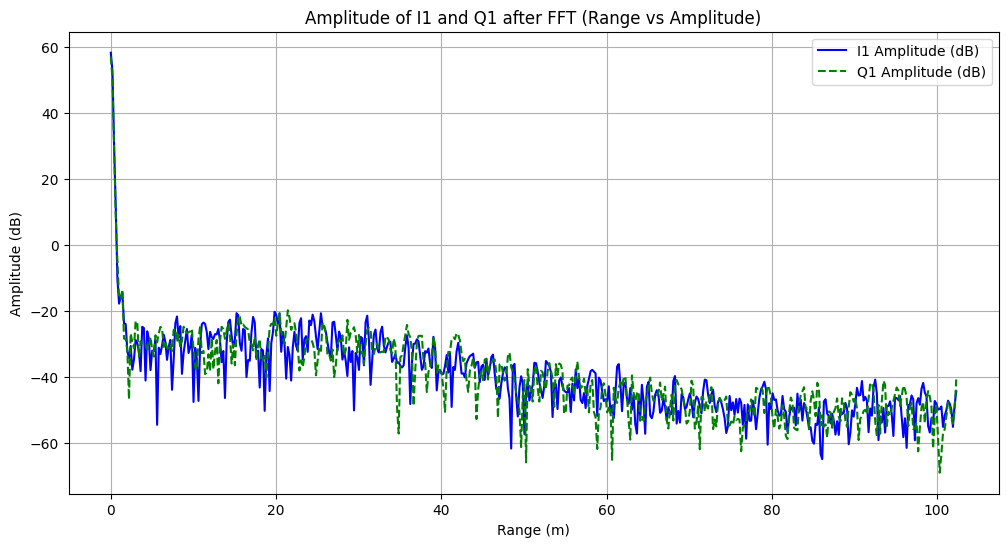

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define a function to plot the I1 and Q1 amplitude (in dB) after FFT for a specific time window
def plot_I1_Q1_amplitude_after_fft(td_data, range_resolution=0.199861, time_step=0.1):
    """
    Plots the amplitude (in dB) of the I1 and Q1 signals after performing FFT along the range bins.
    
    Parameters:
    td_data (numpy array): 3D array of shape (time_samples, range_bins, signals), e.g., (224, 1024, 4).
    range_resolution (float): Resolution in meters (default is 0.199861 meters).
    time_step (float): Time between chirps (s), default is 0.1 seconds.
    
    Returns:
    None: Displays the amplitude in dB of I1 and Q1 after FFT.
    """
    Nd, Nr = td_data.shape[0], td_data.shape[1]  # Number of time samples (chirps) and range bins
    
    # Extract the I1 and Q1 signals
    I1_signal = td_data[:, :, 0]  # I1 signal (Nd, Nr)
    Q1_signal = td_data[:, :, 1]  # Q1 signal (Nd, Nr)
    
    # Apply Hanning window to reduce spectral leakage
    window = np.hanning(Nr)
    I1_signal_windowed = I1_signal * window[np.newaxis, :]
    Q1_signal_windowed = Q1_signal * window[np.newaxis, :]
    
    # Perform FFT along the range bins for both I1 and Q1
    I1_fft = np.fft.fft(I1_signal_windowed, axis=1)
    Q1_fft = np.fft.fft(Q1_signal_windowed, axis=1)
    
    # Take the magnitude of the first half of the FFT results
    I1_amplitude = np.abs(I1_fft[:, :Nr//2])
    Q1_amplitude = np.abs(Q1_fft[:, :Nr//2])
    
    # Convert to dB scale
    I1_amplitude_db = 20 * np.log10(I1_amplitude)
    Q1_amplitude_db = 20 * np.log10(Q1_amplitude)
    
    # Define the range axis (based on range resolution)
    max_range = range_resolution * Nr
    range_axis = np.linspace(0, max_range/2, Nr//2)
    
    # Define the time axis (based on time step)
    time_axis = np.linspace(0, Nd * time_step, Nd)
    
    # Plot the I1 amplitude in dB
    plt.figure(figsize=(12, 6))
    plt.plot(range_axis, I1_amplitude_db[0], label='I1 Amplitude (dB)', color='blue')
    plt.plot(range_axis, Q1_amplitude_db[0], label='Q1 Amplitude (dB)', color='green', linestyle='--')
    
    plt.title('Amplitude of I1 and Q1 after FFT (Range vs Amplitude)')
    plt.xlabel('Range (m)')
    plt.ylabel('Amplitude (dB)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage:
plot_I1_Q1_amplitude_after_fft(td_data, range_resolution=0.199861, time_step=TIME_STEP)


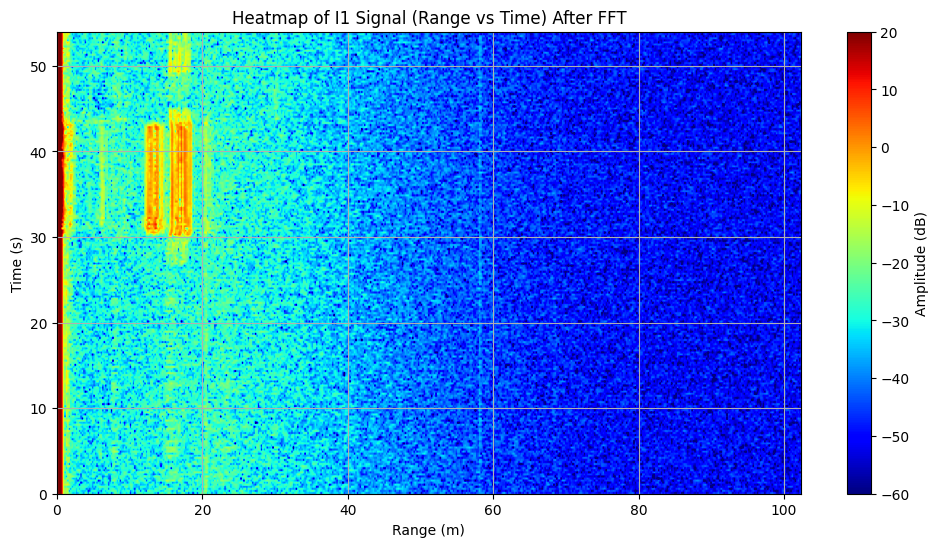

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Define a function to plot a heatmap of the I1 signal after Range FFT with range bins on x-axis, time on y-axis, and amplitude as the scale
def plot_heatmap_I1_with_fft(td_data, range_resolution=0.199861, time_step=0.1):
    """
    Plots a heatmap of the I1 signal after Range FFT with range bins on the x-axis, time on the y-axis, and amplitude as the color scale.
    
    Parameters:
    td_data (numpy array): 3D array of shape (time_samples, range_bins, signals), e.g., (224, 1024, 4).
    range_resolution (float): Resolution in meters (default is 0.199861 meters).
    time_step (float): Time between chirps (s), default is 0.1 seconds.
    
    Returns:
    None: Displays a heatmap with range bins, time, and amplitude of I1 signal after Range FFT.
    """
    Nd, Nr = td_data.shape[0], td_data.shape[1]  # Number of time samples (chirps) and range bins
    
    # Extract the I1 signal (first signal in the last dimension)
    I1_signal = td_data[:, :, 0]  # Shape is (Nd, Nr)
    
    # Apply Hanning window to reduce spectral leakage
    window = np.hanning(Nr)
    I1_signal_windowed = I1_signal * window[np.newaxis, :]
    
    # Perform FFT along the range bins
    I1_fft = np.fft.fft(I1_signal_windowed, axis=1)
    
    # Take the magnitude of the first half of the FFT results
    I1_amplitude = np.abs(I1_fft[:, :Nr//2])
    
    # Convert to dB scale
    I1_amplitude_db = 20 * np.log10(I1_amplitude)
    
    # Define the range axis (based on range resolution)
    max_range = range_resolution * Nr
    range_axis = np.linspace(0, max_range/2, Nr//2)
    
    # Define the time axis (based on time step)
    time_axis = np.linspace(0, Nd * time_step, Nd)
    
    # Plot heatmap
    plt.figure(figsize=(12, 6))
    plt.imshow(I1_amplitude_db, aspect='auto', extent=[range_axis[0], range_axis[-1], time_axis[0], time_axis[-1]], origin='lower', cmap='jet', vmin=-60, vmax=20)
    plt.colorbar(label='Amplitude (dB)')
    
    plt.title('Heatmap of I1 Signal (Range vs Time) After FFT')
    plt.xlabel('Range (m)')
    plt.ylabel('Time (s)')
    plt.grid(True)
    plt.show()

# Example usage:
plot_heatmap_I1_with_fft(td_data, range_resolution=0.199861, time_step=TIME_STEP)



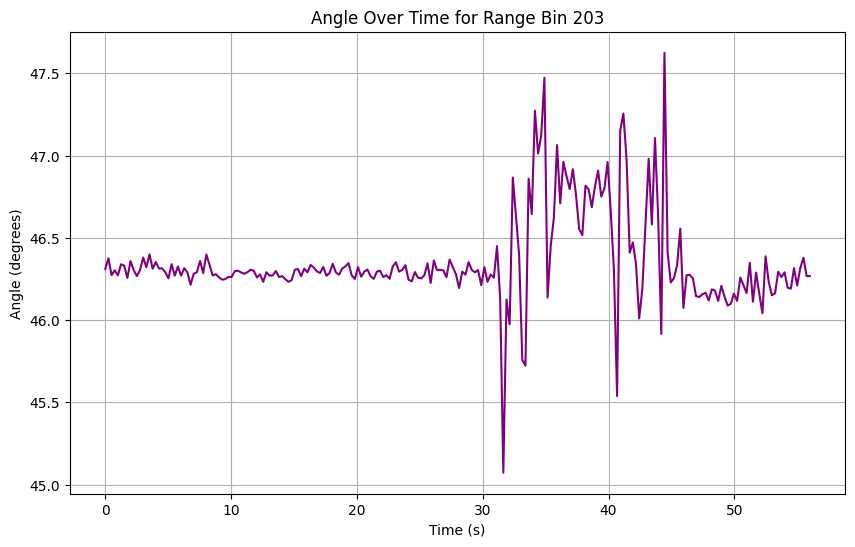

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Define a function to plot the signal angle in degrees based on the I1 and Q1 signals over time
def plot_angle_over_time_degrees(td_data, range_bin, time_step=0.1):
    """
    Plots the detected angle (in degrees) based on the I1 and Q1 signals over time for a specific range bin.
    
    Parameters:
    td_data (numpy array): 3D array of shape (time_samples, range_bins, signals), e.g., (224, 1024, 4).
    range_bin (int): The range bin for which to calculate and plot the angle over time.
    time_step (float): The time between chirps (s), default is 0.1 seconds.
    
    Returns:
    None: Displays the angle over time plot in degrees.
    """
    Nd = td_data.shape[0]  # Number of time samples (chirps)
    
    # Extract the I1 and Q1 signals for the specified range bin over time
    I1_signal = td_data[:, range_bin, 0]  # I1 signal over time
    Q1_signal = td_data[:, range_bin, 1]  # Q1 signal over time
    
    # Calculate the angle over time using arctan(Q1/I1), then convert to degrees
    angles = np.degrees(np.arctan2(Q1_signal, I1_signal))  # Use arctan2 for correct quadrant and convert to degrees
    
    # Time axis
    time_axis = np.linspace(0, Nd * time_step, Nd)
    
    # Plot the angle over time in degrees
    plt.figure(figsize=(10, 6))
    plt.plot(time_axis, angles, label='Angle (degrees)', color='purple')
    
    plt.title(f'Angle Over Time for Range Bin {range_bin}')
    plt.xlabel('Time (s)')
    plt.ylabel('Angle (degrees)')
    plt.grid(True)
    plt.show()

# Example usage:
plot_angle_over_time_degrees(td_data, range_bin=203, time_step=0.25)


(224, 1024)


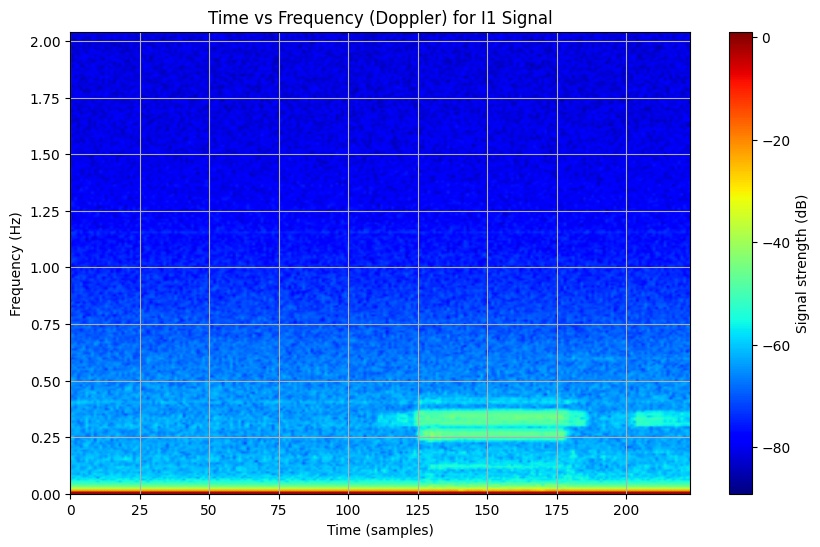

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import stft

def plot_doppler_stft(td_data, fs=1/0.245, nperseg=512):
    """
    Plots a Doppler STFT time-frequency representation for the I1 signal over time.
    
    Parameters:
    - td_data: The time-domain data with shape (224, 1024, 4).
    - fs: The sampling frequency (default: 1/0.245 seconds per sample).
    - nperseg: The number of samples per segment for STFT.
    """
    # Extract the I1 signal (all time samples)
    I1_signal = td_data[:, :, 0]
    print(I1_signal.shape)

    # Initialize empty arrays to store STFT results for all time samples
    all_frequencies = []
    all_Zxx_dB = []

    # Loop through all the time samples and compute the STFT
    for time_idx in range(I1_signal.shape[0]):
        # Compute STFT for each time sample
        f, t, Zxx = stft(I1_signal[time_idx, :], fs=fs, nperseg=nperseg)

        # Convert magnitude to decibels (dB)
        Zxx_dB = 20 * np.log10(np.abs(Zxx) + 1e-6)  # Add small value to avoid log(0)
        
        # Store the frequency and STFT result
        if time_idx == 0:
            all_frequencies = f  # Frequencies are the same for each time sample
        all_Zxx_dB.append(Zxx_dB)

    # Convert list to array for plotting
    all_Zxx_dB = np.array(all_Zxx_dB)

    # Plot the STFT result as a colormap
    plt.figure(figsize=(10, 6))
    plt.pcolormesh(range(I1_signal.shape[0]), all_frequencies, np.mean(all_Zxx_dB, axis=2).T, shading='gouraud', cmap='jet')

    # Set axis labels
    plt.title('Time vs Frequency (Doppler) for I1 Signal')
    plt.ylabel('Frequency (Hz)')
    plt.xlabel('Time (samples)')

    # Add color bar for signal strength
    plt.colorbar(label='Signal strength (dB)')
    
    # Adjust the plot
    plt.ylim([0, np.max(all_frequencies)])  # Focus on positive frequencies (you can adjust this)
    plt.grid(True)
    plt.show()

# Example usage
plot_doppler_stft(td_data, fs=1/0.245, nperseg=512)


(224, 1024)


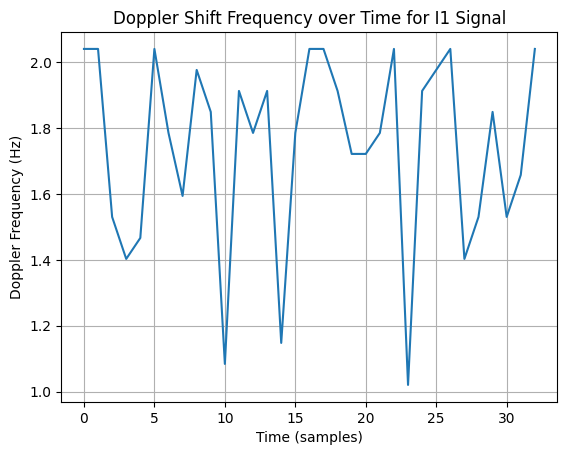

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import stft

def extract_doppler_shift(td_data, fs=1/0.245, nperseg=512):
    """
    Extracts the Doppler shift frequencies for the I1 signal over time using STFT.
    
    Parameters:
    - td_data: The time-domain data with shape (224, 1024, 4).
    - fs: The sampling frequency (default: 1/0.245 seconds per sample).
    - nperseg: The number of samples per segment for STFT.
    
    Returns:
    - doppler_freqs: List of Doppler frequencies (Hz) for each time sample.
    """
    # Extract the I1 signal (all time samples)
    I1_signal = td_data[:, :, 0]
    print(I1_signal.shape)

    # Initialize list to store Doppler frequencies for all time samples
    doppler_freqs = []

    # Loop through all the time samples and compute the STFT
    for time_idx in range(I1_signal.shape[0]):
        # Compute STFT for each time sample
        f, t, Zxx = stft(I1_signal[time_idx, :], fs=fs, nperseg=nperseg)

        # Convert magnitude to decibels (dB)
        Zxx_dB = 20 * np.log10(np.abs(Zxx) + 1e-6)  # Add small value to avoid log(0)

        # For each time index, find the peak Doppler frequency (where the signal strength is highest)
        max_freq_idx = np.argmax(np.abs(Zxx_dB), axis=0)  # Find index of maximum frequency component for each segment
        doppler_f = f[max_freq_idx]  # Get the corresponding Doppler frequency
        doppler_freqs.append(doppler_f)

    return doppler_freqs

# Example usage
doppler_freqs = extract_doppler_shift(td_data, fs=1/0.245, nperseg=64)

# Optional: Print or plot Doppler frequencies over time
plt.plot(doppler_freqs[200])
plt.title('Doppler Shift Frequency over Time for I1 Signal')
plt.xlabel('Time (samples)')
plt.ylabel('Doppler Frequency (Hz)')
plt.grid(True)
plt.show()


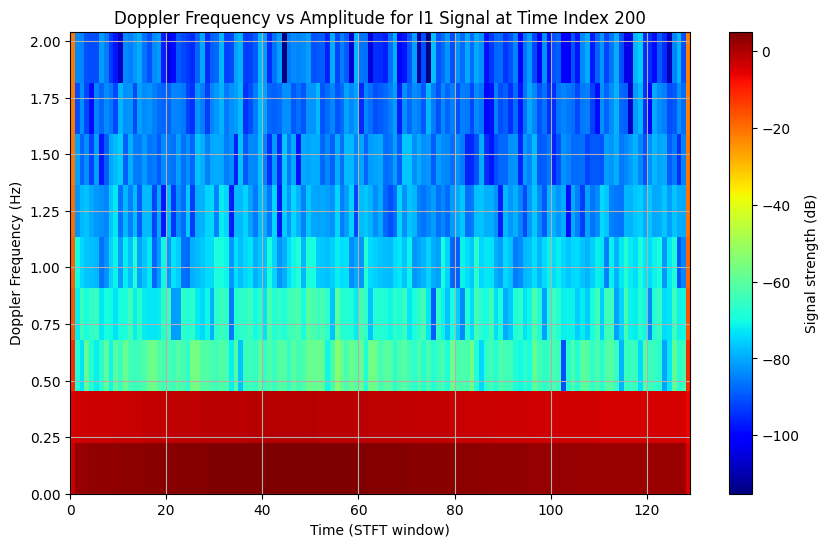

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import stft

def plot_doppler_shift_single_time(td_data, time_idx, fs=1/0.245, nperseg=512):
    """
    Plots a heatmap of Doppler shift frequency (Hz) and corresponding amplitude for a single time period.
    
    Parameters:
    - td_data: The time-domain data with shape (224, 1024, 4).
    - time_idx: The index of the time sample to plot (0 to 223).
    - fs: The sampling frequency (default: 1/0.245 seconds per sample).
    - nperseg: The number of samples per segment for STFT.
    """
    # Extract the I1 signal for the given time index
    I1_signal = td_data[:, :, 0]

    # Compute STFT for the selected time sample
    f, t, Zxx = stft(I1_signal[time_idx, :], fs=fs, nperseg=nperseg)

    # Convert magnitude to decibels (dB)
    Zxx_dB = 20 * np.log10(np.abs(Zxx) + 1e-6)  # Add small value to avoid log(0)

    # Plot the Doppler shift frequencies (f) vs. amplitude (Zxx_dB) as a heatmap
    plt.figure(figsize=(10, 6))

    # Using imshow to create the heatmap
    plt.imshow(Zxx_dB, extent=[0, len(t), f[0], f[-1]], aspect='auto', origin='lower', cmap='jet')

    # Set axis labels
    plt.title(f'Doppler Frequency vs Amplitude for I1 Signal at Time Index {time_idx}')
    plt.ylabel('Doppler Frequency (Hz)')
    plt.xlabel('Time (STFT window)')

    # Add color bar for signal strength
    plt.colorbar(label='Signal strength (dB)')

    plt.grid(True)
    plt.show()

# Example usage
plot_doppler_shift_single_time(td_data, time_idx=200, fs=1/0.245, nperseg=16)


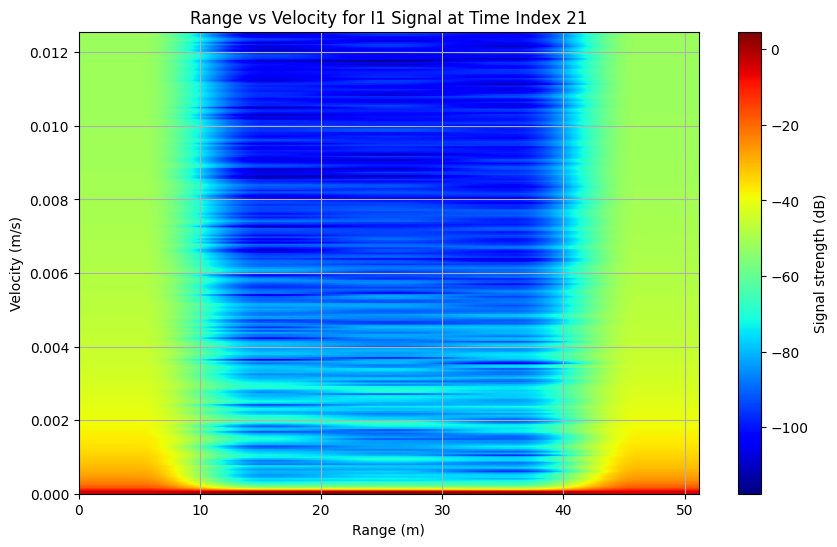

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import stft

def plot_range_velocity_heatmap(td_data, time_idx, f_start, f_stop, fs=1/0.245, nperseg=512, bin_size=199.861):
    """
    Plots Range vs Velocity for a single time period based on the Doppler shift (STFT) for the I1 signal as a heatmap.
    
    Parameters:
    - td_data: The time-domain data with shape (224, 1024, 4).
    - time_idx: The index of the time sample to plot (0 to 223).
    - f_start: Start frequency of the radar in MHz.
    - f_stop: Stop frequency of the radar in MHz.
    - fs: The sampling frequency (default: 1/0.245 seconds per sample).
    - nperseg: The number of samples per segment for STFT.
    - bin_size: Size of each range bin in mm.
    """
    # Constants
    c = 3e8  # Speed of light in m/s
    f_0 = (f_start + f_stop) / 2 * 1e6  # Center frequency in Hz

    # Extract the I1 signal for the given time index
    I1_signal = td_data[:, :, 0]

    # Compute STFT for I1 signal (short-time Fourier transform)
    f, t, Zxx = stft(I1_signal[time_idx, :], fs=fs, nperseg=nperseg)

    # Convert magnitude to decibels (dB)
    Zxx_dB = 20 * np.log10(np.abs(Zxx) + 1e-6)  # Add small value to avoid log(0)

    # Convert frequency to radial velocity (m/s)
    velocity = (c * f) / (2 * f_0)

    # Create the range vector based on the bin size
    range_bins = np.arange(0, len(f)) * bin_size / 1000  # Convert mm to meters

    # Plot the Range vs Velocity as a heatmap
    plt.figure(figsize=(10, 6))
    
    # Use imshow for heatmap, with aspect='auto' to make sure the axes fit correctly
    plt.imshow(Zxx_dB, extent=[range_bins[0], range_bins[-1], velocity[0], velocity[-1]], 
               aspect='auto', origin='lower', cmap='jet')

    # Set axis labels
    plt.title(f'Range vs Velocity for I1 Signal at Time Index {time_idx}')
    plt.ylabel('Velocity (m/s)')
    plt.xlabel('Range (m)')

    # Add color bar for signal strength
    plt.colorbar(label='Signal strength (dB)')

    plt.grid(True)
    plt.show()

# Example usage
plot_range_velocity_heatmap(td_data, time_idx=21, f_start=24000, f_stop=24750, fs=1/0.245, nperseg=512, bin_size=199.861)



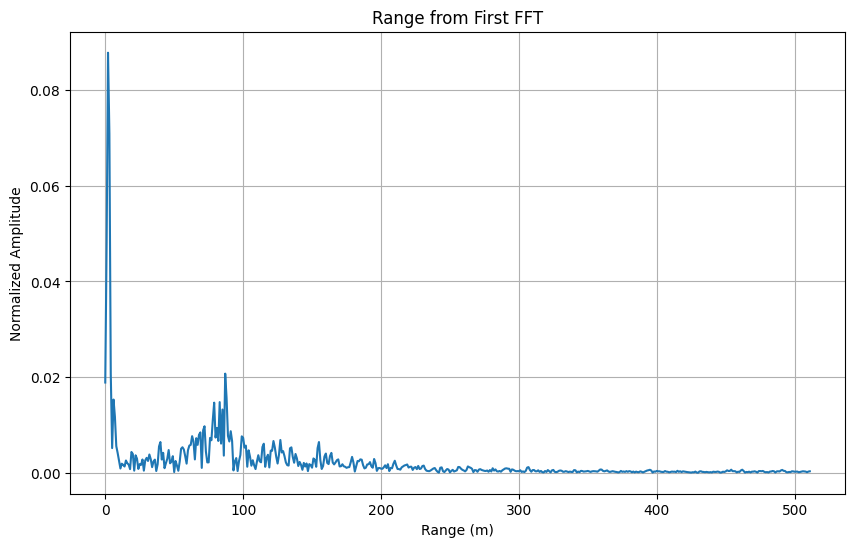

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Define Nr (number of range bins) and Nd (number of Doppler bins)
Nr = 1024  # Range FFT size (based on your 1024 voltage values per signal)
Nd = 224   # Doppler FFT size (based on your 224 time samples)

# Assuming 'td_data' is your radar data (224, 1024, 4), and you're working with I1 signal (as an example)

# Extract I1 signal (shape: 224, 1024)
Mix = td_data[:, :, 0]  # Using I1 signal

# Remove DC offset from I1 signal
Mix_dc_removed = Mix - np.mean(Mix, axis=0)

# Apply Hanning window to reduce spectral leakage
window = np.hanning(Nr)  # Apply window for the range FFT size (1024)
Mix_windowed = Mix_dc_removed * window[np.newaxis, :]  # Broadcasting the window

# Perform 1D FFT along the range bins (Nr) and normalize
FFT1 = np.fft.fft(Mix_windowed, Nr, axis=1)
FFT1 = np.abs(FFT1)
FFT_Norm = FFT1 / np.max(FFT1)  # Normalize the FFT result

# Take the single-sided FFT (only the first half of the range FFT results)
FFT_single_side = FFT_Norm[:, :Nr//2]

# Plot the normalized FFT output (single-sided) for range
plt.figure(figsize=(10, 6))
plt.plot(FFT_single_side[0, :])  # Plotting the FFT for the first time sample (you can choose different ones)
plt.title('Range from First FFT')
plt.xlabel('Range (m)')
plt.ylabel('Normalized Amplitude')
plt.grid(True)
plt.show()


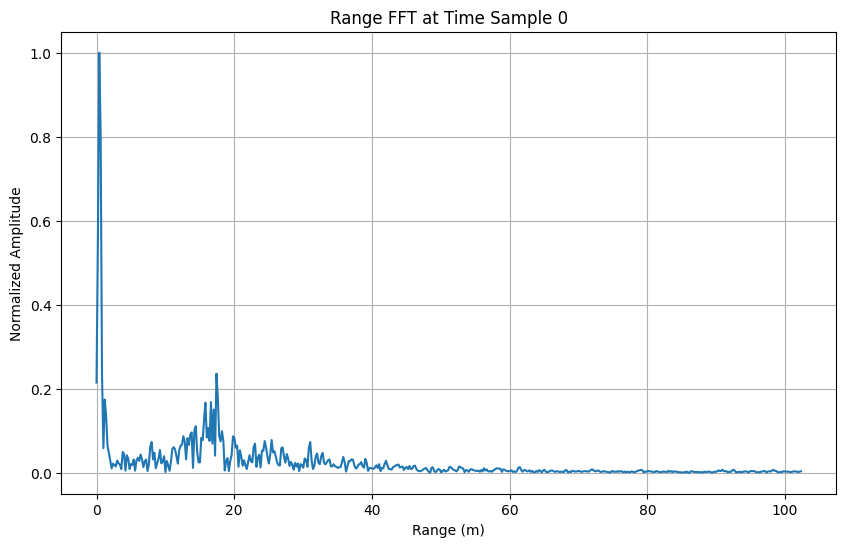

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Define a function to plot the first FFT based on the given code
def plot_first_fft(td_data, time_index, range_resolution=0.199861):
    """
    Plots the first FFT (range FFT) for a specific time index from the radar data.
    
    Parameters:
    td_data (numpy array): 3D array of shape (time_samples, range_bins, signals), e.g., (224, 1024, 4).
    time_index (int): The time index (chirp) for which to plot the FFT.
    range_resolution (float): Resolution in meters (default is 0.199861 meters).
    
    Returns:
    None: Displays the range FFT plot.
    """
    Nr = td_data.shape[1]  # Range FFT size (based on the number of range bins, 1024)
    
    # Extract the I1 signal (index 0 in the last dimension) for the specified time index
    Mix_original = td_data[:, :, 0] 
    Mix = td_data[time_index, :, 0]  # Shape is (Nr,)
    
    # Remove DC offset from the signal
    Mix_dc_removed = Mix - np.mean(Mix_original, axis=0)
    
    # Apply Hanning window to reduce spectral leakage
    window = np.hanning(Nr)  # Apply window for the range FFT size (1024)
    Mix_windowed = Mix_dc_removed * window  # Apply windowing
    
    # Perform 1D FFT along the range bins (Nr) and normalize
    FFT1 = np.fft.fft(Mix_windowed, Nr)
    FFT1 = np.abs(FFT1)
    FFT1_Norm = FFT1 / np.max(FFT1)  # Normalize the FFT result
    
    # Take the single-sided FFT (only the first half of the range FFT results)
    FFT_single_side = FFT1_Norm[:Nr//2]
    
    # Define Range Axis
    max_range = range_resolution * Nr  # Maximum range from FFT
    range_axis = np.linspace(0, max_range/2, Nr//2)  # Take the first half of the range FFT
    
    # Plot the normalized FFT output (single-sided) for range
    plt.figure(figsize=(10, 6))
    plt.plot(range_axis, FFT_single_side)  # Plotting the FFT for the specified time sample
    plt.title(f'Range FFT at Time Sample {time_index}')
    plt.xlabel('Range (m)')
    plt.ylabel('Normalized Amplitude')
    plt.grid(True)
    plt.show()
    

# Example usage:
plot_first_fft(td_data, time_index=0)


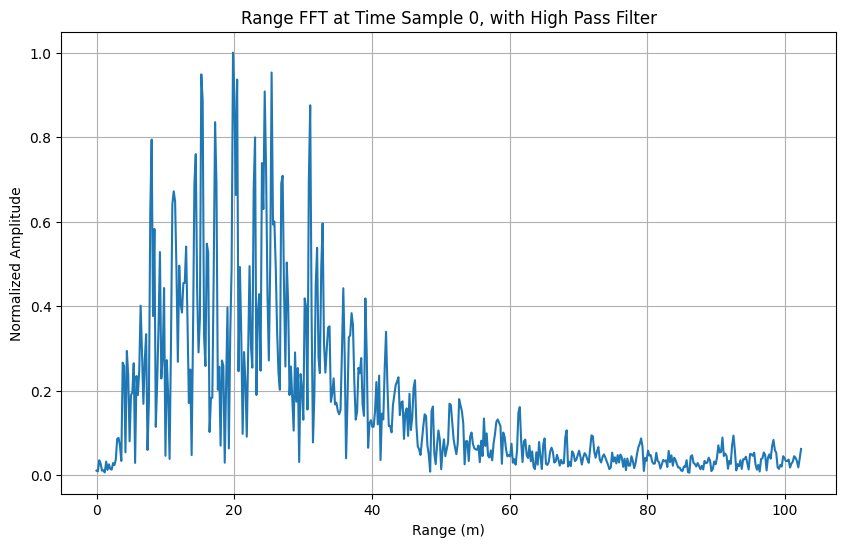

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

def highpass_filter(signal, cutoff, fs, order=4):
    """
    Applies a high-pass filter to the signal to remove low-frequency components.
    
    Parameters:
    signal (numpy array): Input signal.
    cutoff (float): The cutoff frequency for the high-pass filter.
    fs (float): The sampling frequency (in this case, based on range).
    order (int): The order of the filter (default is 5).
    
    Returns:
    filtered_signal (numpy array): The filtered signal.
    """
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    filtered_signal = filtfilt(b, a, signal)
    return filtered_signal

# Define a function to plot the first FFT based on the given code
def plot_first_fft(td_data, time_index, range_resolution=0.199861):
    """
    Plots the first FFT (range FFT) for a specific time index from the radar data.
    
    Parameters:
    td_data (numpy array): 3D array of shape (time_samples, range_bins, signals), e.g., (224, 1024, 4).
    time_index (int): The time index (chirp) for which to plot the FFT.
    range_resolution (float): Resolution in meters (default is 0.199861 meters).
    
    Returns:
    None: Displays the range FFT plot.
    """
    Nr = td_data.shape[1]  # Range FFT size (based on the number of range bins, 1024)
    
    # Extract the I1 signal (index 0 in the last dimension) for the specified time index
    Mix = td_data[time_index, :, 0]  # Shape is (Nr,)
    
    # Remove DC offset by subtracting the mean (already done in previous code)
    Mix_dc_removed = Mix - np.mean(Mix)
    
    # Apply Hanning window to reduce spectral leakage
    window = np.hanning(Nr)  # Apply window for the range FFT size (1024)
    Mix_windowed = Mix_dc_removed * window  # Apply windowing
    
    # Apply high-pass filter to remove low-frequency components
    fs = 1 / range_resolution  # Sampling frequency based on range resolution
    cutoff = 0.1  # Set the cutoff frequency (you can adjust this value)
    Mix_filtered = highpass_filter(Mix_windowed, cutoff=cutoff, fs=fs, order=2)  # Apply high-pass filter
    
    # Perform 1D FFT along the range bins (Nr) and normalize
    FFT1 = np.fft.fft(Mix_filtered, Nr)
    FFT1 = np.abs(FFT1)
    FFT1_Norm = FFT1 / np.max(FFT1)  # Normalize the FFT result
    
    # Take the single-sided FFT (only the first half of the range FFT results)
    FFT_single_side = FFT1_Norm[:Nr//2]
    
    # Define Range Axis
    max_range = range_resolution * Nr  # Maximum range from FFT
    range_axis = np.linspace(0, max_range/2, Nr//2)  # Take the first half of the range FFT
    
    # Plot the normalized FFT output (single-sided) for range
    plt.figure(figsize=(10, 6))
    plt.plot(range_axis, FFT_single_side)  # Plotting the FFT for the specified time sample
    plt.title(f'Range FFT at Time Sample {time_index}, with High Pass Filter')
    plt.xlabel('Range (m)')
    plt.ylabel('Normalized Amplitude')
    plt.grid(True)
    plt.show()

# Example usage:
plot_first_fft(td_data, time_index=0)


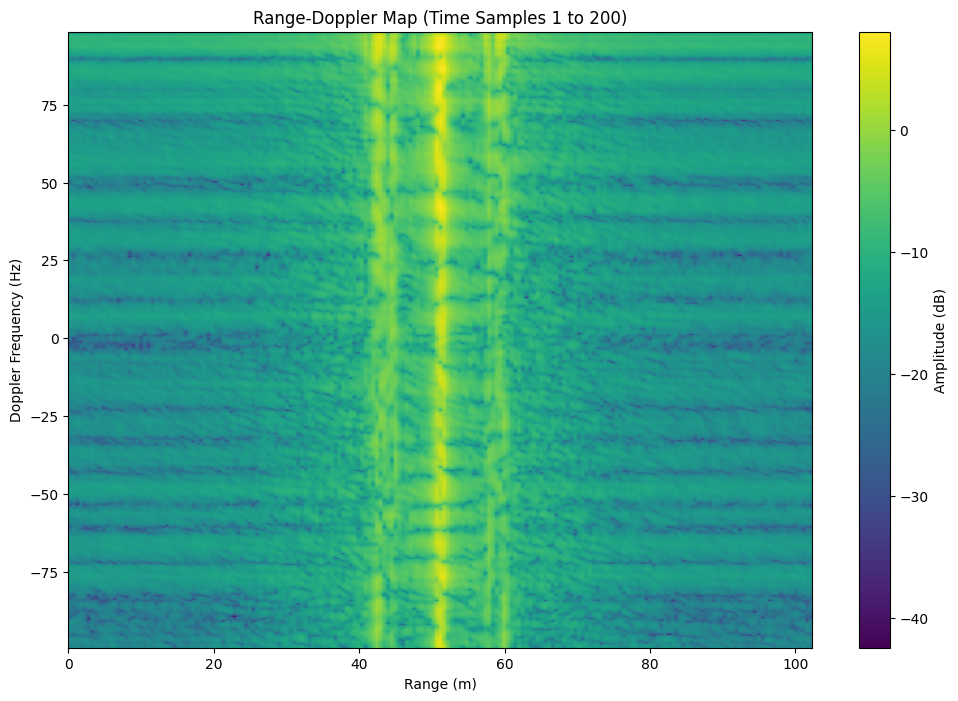

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function to generate Range-Doppler Map for a specific time window
def plot_range_doppler_map(td_data, start_sample, end_sample, range_resolution=0.199861):
    """
    Plots the Range-Doppler map for a specific time window from the radar data.
    
    Parameters:
    td_data (numpy array): 3D array of shape (time_samples, range_bins, signals), e.g., (224, 1024, 4).
    start_sample (int): Start index of the time window (chirps).
    end_sample (int): End index of the time window (chirps).
    range_resolution (float): Resolution in meters (default is 0.199861 meters).
    
    Returns:
    None: Displays the Range-Doppler map.
    """
    Nr = td_data.shape[1]  # Range FFT size (based on the number of range bins, 1024)
    Nd = end_sample - start_sample  # Doppler FFT size for the selected time window
    
    # Extract the I1 signal (index 0 in the last dimension)
    Mix = td_data[start_sample:end_sample, :, 0]  # Shape is (Nd, Nr)
    
    # Remove DC offset from the selected time window
    Mix_dc_removed = Mix - np.mean(Mix, axis=0)
    
    # Apply Hanning window to reduce spectral leakage
    window = np.hanning(Nr)  # Apply window for the range FFT size (1024)
    Mix_windowed = Mix_dc_removed * window[np.newaxis, :]  # Broadcasting the window
    
    # Perform 1D FFT along the range bins (Nr)
    FFT1 = np.fft.fft(Mix_windowed, Nr, axis=1)
    FFT1 = np.abs(FFT1)
    FFT1_Norm = FFT1 / np.max(FFT1)  # Normalize the FFT result
    
    # Perform 2D FFT using Nr for range and Nd for Doppler
    sig_fft2 = np.fft.fft2(Mix_windowed, [Nr, Nd])
    sig_fft2 = np.fft.fftshift(sig_fft2)  # Shift the FFT for better visualization
    RDM = np.abs(sig_fft2)
    RDM = 10 * np.log10(RDM)  # Convert to log scale (dB)
    
    # Define Range and Doppler axes
    max_range = range_resolution * Nr  # Maximum range from FFT
    range_axis = np.linspace(0, max_range/2, Nr//2)  # Take the first half of the range FFT
    
    doppler_axis = np.linspace(-Nd/2, Nd/2-1, Nd)  # Doppler frequency for the time window
    
    # Use imshow for Range-Doppler Map
    plt.figure(figsize=(12, 8))
    plt.imshow(RDM[:Nr//2, :], aspect='auto', extent=[range_axis[0], range_axis[-1], doppler_axis[0], doppler_axis[-1]], origin='lower')
    plt.title(f'Range-Doppler Map (Time Samples {start_sample} to {end_sample})')
    plt.xlabel('Range (m)')
    plt.ylabel('Doppler Frequency (Hz)')
    plt.colorbar(label='Amplitude (dB)')
    plt.show()

# Example usage:
plot_range_doppler_map(td_data, start_sample=1, end_sample=200)



In [18]:
from scipy.signal import stft
import numpy as np
import matplotlib.pyplot as plt

# Define the function to generate Range-Doppler Map using STFT for a specific time window
def plot_range_doppler_map_stft(td_data, start_sample, end_sample, range_resolution=0.199861, window_size=64, noverlap=32):
    """
    Plots the Range-Doppler map using STFT for a specific time window from the radar data.
    
    Parameters:
    td_data (numpy array): 3D array of shape (time_samples, range_bins, signals), e.g., (224, 1024, 4).
    start_sample (int): Start index of the time window (chirps).
    end_sample (int): End index of the time window (chirps).
    range_resolution (float): Resolution in meters (default is 0.199861 meters).
    window_size (int): Size of the STFT window (default 64).
    noverlap (int): Overlap between STFT windows (default 32).
    
    Returns:
    None: Displays the Range-Doppler map using STFT.
    """
    Nr = td_data.shape[1]  # Number of range bins (1024)
    Nd = end_sample - start_sample  # Number of Doppler samples (time samples in this case)
    
    # Extract the I1 signal (index 0 in the last dimension) for a specific time window
    Mix = td_data[start_sample:end_sample, :, ]  # Shape is (Nd, Nr)
    
    # Remove DC offset from the selected time window
    Mix_dc_removed = Mix - np.mean(Mix, axis=0)
    
    # Apply Hanning window to reduce spectral leakage (for range bins)
    window = np.hanning(Nr)  # Apply window for the range FFT size (1024)
    Mix_windowed = Mix_dc_removed * window[np.newaxis, :]  # Broadcasting the window
    
    # Perform STFT along the range bins (Nr), for each of the Doppler time window
    f, t, Zxx = stft(Mix_windowed.T, fs=1, nperseg=window_size, noverlap=noverlap)
    
    # Compute the magnitude of the STFT result and reduce to 2D by averaging over the 3rd dimension
    RDM = np.abs(Zxx)
    RDM_mean = np.mean(RDM, axis=-1)  # Shape (512, 33) -> averaging across time windows
    RDM_dB = 10 * np.log10(RDM_mean + 1e-10)  # Convert to log scale (dB) and add small offset to avoid log(0)
    
    # Define Range and Doppler axes
    max_range = range_resolution * Nr  # Maximum range from FFT
    range_axis = np.linspace(0, max_range/2, Nr//2)  # Take the first half of the range FFT
    
    doppler_axis = np.linspace(-Nd/2, Nd/2-1, len(t))  # Doppler frequency based on STFT results
    
    # Plot Range-Doppler Map using STFT results
    plt.figure(figsize=(12, 8))
    plt.imshow(RDM_dB[:Nr//2, :], aspect='auto', extent=[range_axis[0], range_axis[-1], doppler_axis[0], doppler_axis[-1]], origin='lower')
    plt.title(f'Range-Doppler Map (STFT) for Time Samples {start_sample} to {end_sample}')
    plt.xlabel('Range (m)')
    plt.ylabel('Doppler Frequency (Hz)')
    plt.colorbar(label='Amplitude (dB)')
    plt.show()

# Example usage:
plot_range_doppler_map_stft(td_data, start_sample=1, end_sample=200, window_size=64, noverlap=32)


ValueError: operands could not be broadcast together with shapes (199,1024,4) (1,1024) 

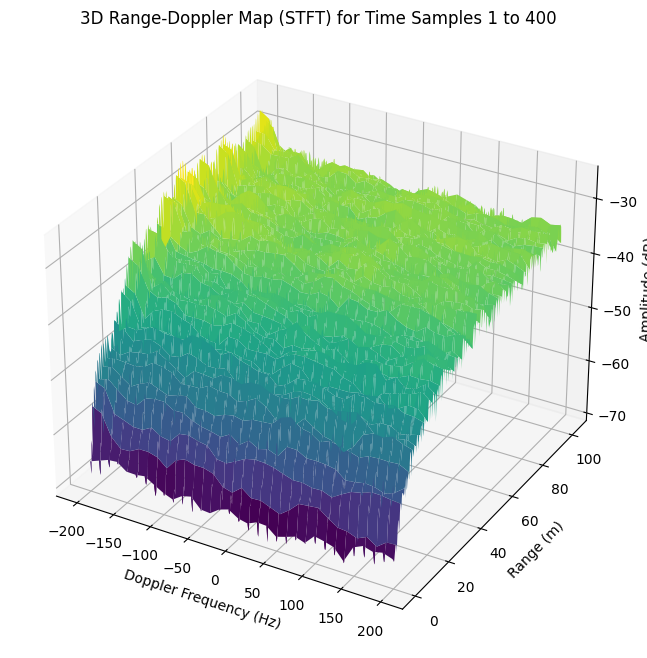

In [232]:
from scipy.signal import stft
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the function to generate 3D Range-Doppler Map using STFT for a specific time window
def plot_range_doppler_map_stft_3d(td_data, start_sample, end_sample, range_resolution=0.199861, window_size=64, noverlap=32):
    """
    Plots the 3D Range-Doppler map using STFT for a specific time window from the radar data.
    
    Parameters:
    td_data (numpy array): 3D array of shape (time_samples, range_bins, signals), e.g., (224, 1024, 4).
    start_sample (int): Start index of the time window (chirps).
    end_sample (int): End index of the time window (chirps).
    range_resolution (float): Resolution in meters (default is 0.199861 meters).
    window_size (int): Size of the STFT window (default 64).
    noverlap (int): Overlap between STFT windows (default 32).
    
    Returns:
    None: Displays the 3D Range-Doppler map using STFT.
    """
    Nr = td_data.shape[1]  # Number of range bins (1024)
    Nd = end_sample - start_sample  # Number of Doppler samples (time samples in this case)
    
    # Extract the I1 signal (index 0 in the last dimension) for a specific time window
    Mix = td_data[start_sample:end_sample, :, 0]  # Shape is (Nd, Nr)
    
    # Remove DC offset from the selected time window
    Mix_dc_removed = Mix - np.mean(Mix, axis=0)
    
    # Apply Hanning window to reduce spectral leakage (for range bins)
    window = np.hanning(Nr)  # Apply window for the range FFT size (1024)
    Mix_windowed = Mix_dc_removed * window[np.newaxis, :]  # Broadcasting the window
    
    fs = 1 / range_resolution  # Sampling frequency based on range resolution
    cutoff = 0.1  # Set the cutoff frequency (you can adjust this value)
    Mix_filtered = highpass_filter(Mix_windowed, cutoff=cutoff, fs=fs, order=2)  # Apply high-pass filter
    
    # Perform STFT along the range bins (Nr), for each of the Doppler time window
    f, t, Zxx = stft(Mix_filtered.T, fs=1/0.241, nperseg=window_size, noverlap=noverlap)
    
    # Compute the magnitude of the STFT result
    RDM = np.abs(Zxx)  # Shape (512, 33, 8)
    
    # Option 1: Average across time windows (axis=2)
    RDM_avg = np.mean(RDM, axis=2)  # Reduce to (512, 33)

    # Convert to log scale (dB) and add small offset to avoid log(0)
    RDM_dB = 10 * np.log10(RDM_avg + 1e-10)
    
    # Define Range and Doppler axes
    max_range = range_resolution * Nr  # Maximum range from FFT
    range_axis = np.linspace(0, max_range/2, Nr//2)  # Take the first half of the range FFT
    
    doppler_axis = np.linspace(-Nd/2, Nd/2-1, RDM_dB.shape[1])  # Doppler frequency based on STFT results
    
    # Prepare 3D meshgrid for plotting
    X, Y = np.meshgrid(doppler_axis, range_axis)  # Adjust meshgrid according to RDM dimensions
    
    # Ensure Z is 2D and matches the X and Y meshgrid
    Z = RDM_dB[:Nr//2, :]

    # Plot 3D Range-Doppler Map using STFT results
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot the 3D surface
    ax.plot_surface(X, Y, Z, cmap='viridis')

    ax.set_title(f'3D Range-Doppler Map (STFT) for Time Samples {start_sample} to {end_sample}')
    ax.set_xlabel('Doppler Frequency (Hz)')
    ax.set_ylabel('Range (m)')
    ax.set_zlabel('Amplitude (dB)')
    
    plt.show()

# Example usage:
plot_range_doppler_map_stft_3d(td_data, start_sample=1, end_sample=400, window_size=64, noverlap=32)


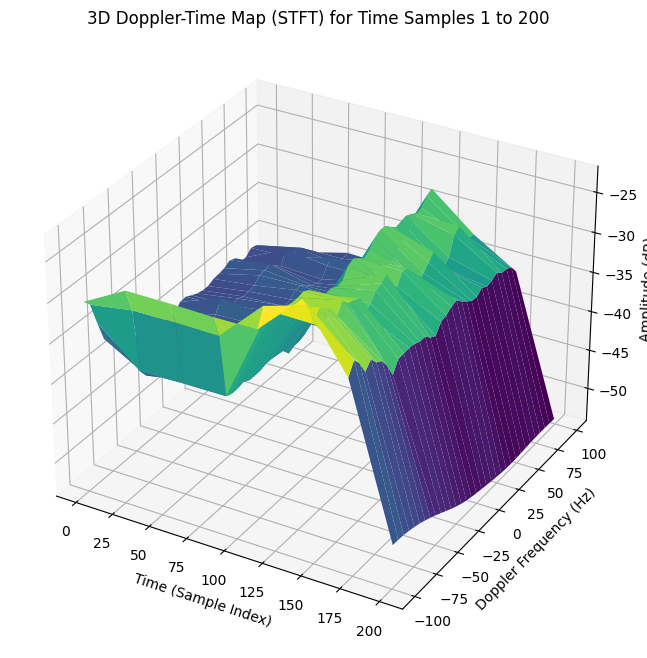

In [233]:
from scipy.signal import stft
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the function to generate 3D Doppler-Time Map using STFT
def plot_doppler_time_map_stft_3d(td_data, start_sample, end_sample, window_size=64, noverlap=32):
    """
    Plots the 3D Doppler-Time map using STFT for a specific time window from the radar data.
    
    Parameters:
    td_data (numpy array): 3D array of shape (time_samples, range_bins, signals), e.g., (224, 1024, 4).
    start_sample (int): Start index of the time window (chirps).
    end_sample (int): End index of the time window (chirps).
    window_size (int): Size of the STFT window (default 64).
    noverlap (int): Overlap between STFT windows (default 32).
    
    Returns:
    None: Displays the 3D Doppler-Time map using STFT.
    """
    Nr = td_data.shape[1]  # Number of range bins (1024)
    Nd = end_sample - start_sample  # Number of Doppler samples (time samples in this case)
    
    # Extract the I1 signal (index 0 in the last dimension) for a specific time window
    Mix = td_data[start_sample:end_sample, :, 0]  # Shape is (Nd, Nr)
    
    # Remove DC offset from the selected time window
    Mix_dc_removed = Mix - np.mean(Mix, axis=0)
    
    # Apply Hanning window to reduce spectral leakage (for range bins)
    window = np.hanning(Nr)  # Apply window for the range FFT size (1024)
    Mix_windowed = Mix_dc_removed * window[np.newaxis, :]  # Broadcasting the window
    
    # Perform STFT along the range bins (Nr), for each of the Doppler time window
    f, t, Zxx = stft(Mix_windowed.T, fs=1, nperseg=window_size, noverlap=noverlap)
    
    # Compute the magnitude of the STFT result
    RDM = np.abs(Zxx)  # Shape (512, 33, 8)
    
    # Option 1: Average across range bins (axis=0) to get time vs Doppler
    RDM_avg = np.mean(RDM, axis=0)  # Reduce to (33, 8) -> (Doppler bins, time windows)

    # Convert to log scale (dB) and add small offset to avoid log(0)
    RDM_dB = 10 * np.log10(RDM_avg + 1e-10)
    
    # Define Time and Doppler axes
    doppler_axis = np.linspace(-Nd/2, Nd/2-1, RDM_dB.shape[0])  # Doppler frequency based on STFT results
    time_axis = np.linspace(start_sample, end_sample, RDM_dB.shape[1])  # Time window for time axis
    
    # Prepare 3D meshgrid for plotting
    X, Y = np.meshgrid(time_axis, doppler_axis)  # Adjust meshgrid according to time and Doppler dimensions
    
    # Ensure Z is 2D and matches the X and Y meshgrid
    Z = RDM_dB

    # Plot 3D Doppler-Time Map using STFT results
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot the 3D surface
    ax.plot_surface(X, Y, Z, cmap='viridis')

    ax.set_title(f'3D Doppler-Time Map (STFT) for Time Samples {start_sample} to {end_sample}')
    ax.set_xlabel('Time (Sample Index)')
    ax.set_ylabel('Doppler Frequency (Hz)')
    ax.set_zlabel('Amplitude (dB)')
    
    plt.show()

# Example usage:
plot_doppler_time_map_stft_3d(td_data, start_sample=1, end_sample=200, window_size=64, noverlap=32)


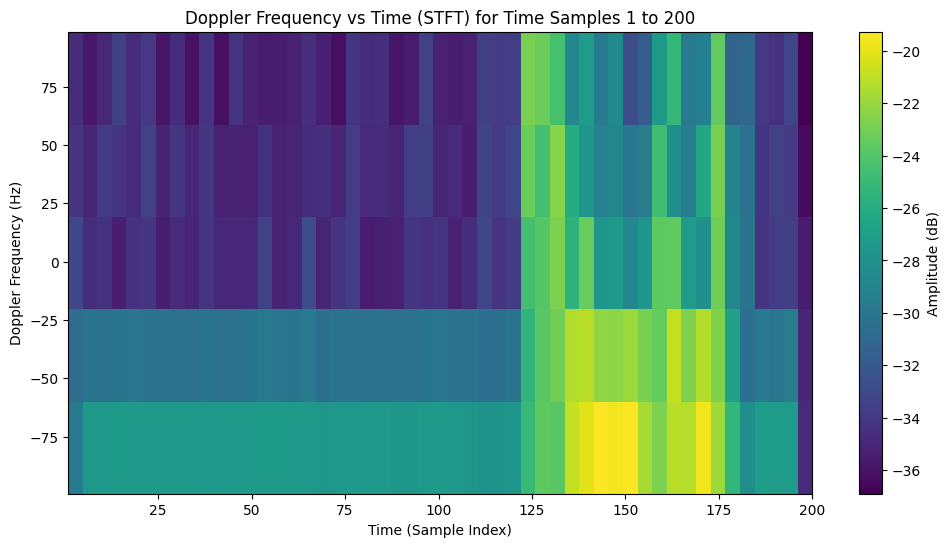

In [244]:
from scipy.signal import stft
import numpy as np
import matplotlib.pyplot as plt

# Define the function to generate 2D Doppler-Time heatmap using STFT
def plot_doppler_time_heatmap_stft(td_data, start_sample, end_sample, window_size=64, noverlap=32):
    """
    Plots the 2D Doppler-Time heatmap using STFT for a specific time window from the radar data.
    
    Parameters:
    td_data (numpy array): 3D array of shape (time_samples, range_bins, signals), e.g., (224, 1024, 4).
    start_sample (int): Start index of the time window (chirps).
    end_sample (int): End index of the time window (chirps).
    window_size (int): Size of the STFT window (default 64).
    noverlap (int): Overlap between STFT windows (default 32).
    
    Returns:
    None: Displays the 2D Doppler-Time heatmap using STFT.
    """
    Nr = td_data.shape[1]  # Number of range bins (1024)
    Nd = end_sample - start_sample  # Number of Doppler samples (time samples in this case)
    
    # Extract the I1 signal (index 0 in the last dimension) for a specific time window
    Mix = td_data[start_sample:end_sample, :, 0]  # Shape is (Nd, Nr)
    
    # Remove DC offset from the selected time window
    Mix_dc_removed = Mix - np.mean(Mix, axis=0)
    
    # Apply Hanning window to reduce spectral leakage (for range bins)
    window = np.hanning(Nr)  # Apply window for the range FFT size (1024)
    Mix_windowed = Mix_dc_removed * window[np.newaxis, :]  # Broadcasting the window
    
    # Perform STFT along the range bins (Nr), for each of the Doppler time window
    f, t, Zxx = stft(Mix_windowed.T, fs=1, nperseg=window_size, noverlap=noverlap)
    
    # Compute the magnitude of the STFT result
    RDM = np.abs(Zxx)  # Shape (512, 33, 8)
    
    # Average across range bins (axis=0) to get time vs Doppler frequency
    RDM_avg = np.mean(RDM, axis=0)  # Reduce to (33, 8) -> (Doppler bins, time windows)

    # Convert to log scale (dB) and add small offset to avoid log(0)
    RDM_dB = 10 * np.log10(RDM_avg + 1e-10)
    
    # Define Time and Doppler axes
    doppler_axis = np.linspace(-Nd/2, Nd/2-1, RDM_dB.shape[0])  # Doppler frequency based on STFT results
    time_axis = np.linspace(start_sample, end_sample, RDM_dB.shape[1])  # Time window for time axis
    
    # Plot the 2D heatmap (time vs Doppler frequency)
    plt.figure(figsize=(12, 6))
    plt.imshow(RDM_dB, aspect='auto', origin='lower', extent=[time_axis[0], time_axis[-1], doppler_axis[0], doppler_axis[-1]], cmap='viridis')
    
    plt.title(f'Doppler Frequency vs Time (STFT) for Time Samples {start_sample} to {end_sample}')
    plt.xlabel('Time (Sample Index)')
    plt.ylabel('Doppler Frequency (Hz)')
    plt.colorbar(label='Amplitude (dB)')
    plt.show()

# Example usage:
plot_doppler_time_heatmap_stft(td_data, start_sample=1, end_sample=200, window_size=8, noverlap=4)


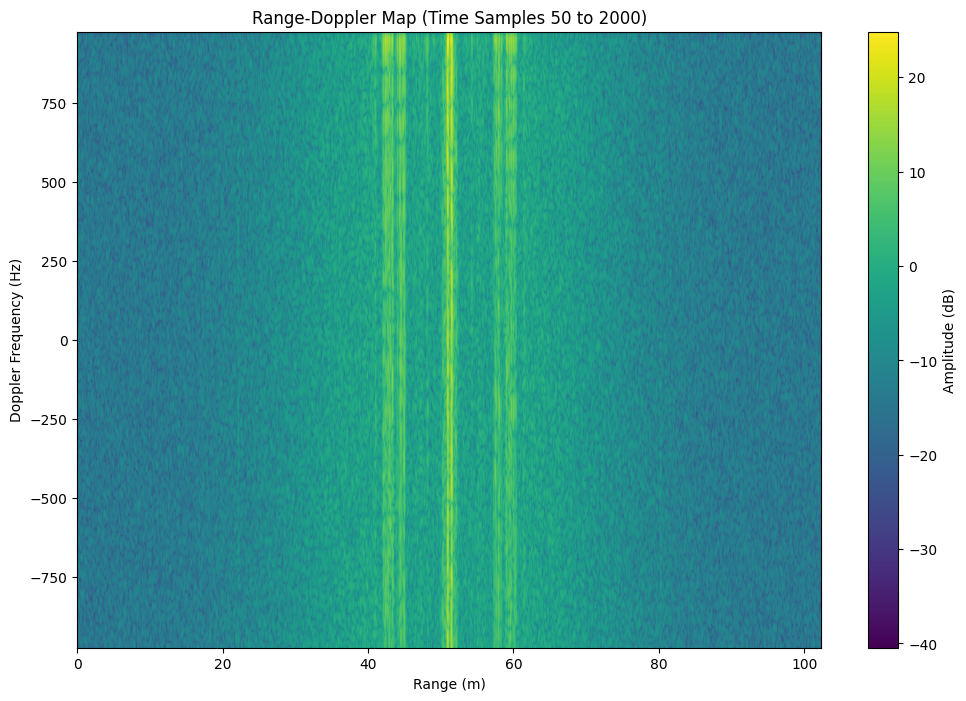

In [237]:

# Not normalized
# 
# import numpy as np
import matplotlib.pyplot as plt

# Define the function to generate Range-Doppler Map for a specific time window
def plot_range_doppler_map(td_data, start_sample, end_sample, range_resolution=0.199861):
    """
    Plots the Range-Doppler map for a specific time window from the radar data.
    
    Parameters:
    td_data (numpy array): 3D array of shape (time_samples, range_bins, signals), e.g., (224, 1024, 4).
    start_sample (int): Start index of the time window (chirps).
    end_sample (int): End index of the time window (chirps).
    range_resolution (float): Resolution in meters (default is 0.199861 meters).
    
    Returns:
    None: Displays the Range-Doppler map.
    """
    Nr = td_data.shape[1]  # Range FFT size (based on the number of range bins, 1024)
    Nd = end_sample - start_sample  # Doppler FFT size for the selected time window
    
    # Extract the I1 signal (index 0 in the last dimension)
    Mix = td_data[start_sample:end_sample, :, 0]  # Shape is (Nd, Nr)
    
    # Remove DC offset from the selected time window
    Mix_dc_removed = Mix - np.mean(Mix, axis=0)
    
    # Apply Hanning window to reduce spectral leakage
    window = np.hanning(Nr)  # Apply window for the range FFT size (1024)
    Mix_windowed = Mix_dc_removed * window[np.newaxis, :]  # Broadcasting the window
    
    # Perform 1D FFT along the range bins (Nr)
    FFT1 = np.fft.fft(Mix_windowed, Nr, axis=1)
    FFT1 = np.abs(FFT1)
    FFT1_Norm = FFT1   # Normalize the FFT result
    
    # Perform 2D FFT using Nr for range and Nd for Doppler
    sig_fft2 = np.fft.fft2(Mix_windowed, [Nr, Nd])
    sig_fft2 = np.fft.fftshift(sig_fft2)  # Shift the FFT for better visualization
    RDM = np.abs(sig_fft2)
    RDM = 10 * np.log10(RDM)  # Convert to log scale (dB)
    
    # Define Range and Doppler axes
    max_range = range_resolution * Nr  # Maximum range from FFT
    range_axis = np.linspace(0, max_range/2, Nr//2)  # Take the first half of the range FFT
    
    doppler_axis = np.linspace(-Nd/2, Nd/2-1, Nd)  # Doppler frequency for the time window
    
    # Use imshow for Range-Doppler Map
    plt.figure(figsize=(12, 8))
    plt.imshow(RDM[:Nr//2, :], aspect='auto', extent=[range_axis[0], range_axis[-1], doppler_axis[0], doppler_axis[-1]], origin='lower')
    plt.title(f'Range-Doppler Map (Time Samples {start_sample} to {end_sample})')
    plt.xlabel('Range (m)')
    plt.ylabel('Doppler Frequency (Hz)')
    plt.colorbar(label='Amplitude (dB)')
    plt.show()

# Example usage:
plot_range_doppler_map(td_data, start_sample=50, end_sample=2000)


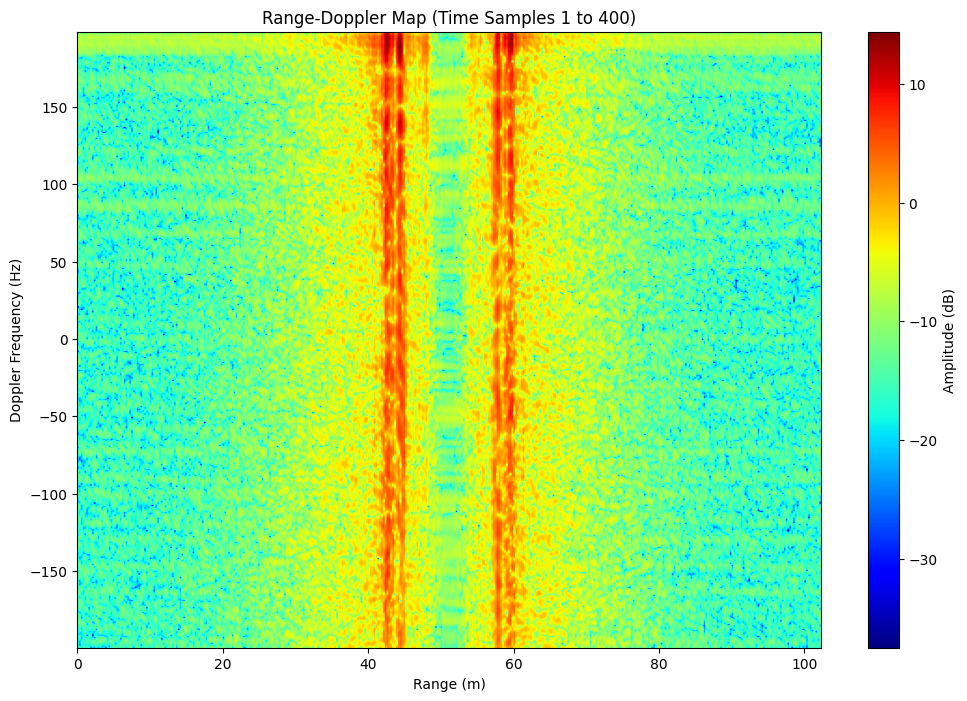

In [112]:
# Define the function to generate Range-Doppler Map for a specific time window
def plot_range_doppler_map_with_highpass_filter(td_data, start_sample, end_sample, range_resolution=0.199861):
    """
    Plots the Range-Doppler map for a specific time window from the radar data.
    
    Parameters:
    td_data (numpy array): 3D array of shape (time_samples, range_bins, signals), e.g., (224, 1024, 4).
    start_sample (int): Start index of the time window (chirps).
    end_sample (int): End index of the time window (chirps).
    range_resolution (float): Resolution in meters (default is 0.199861 meters).
    
    Returns:
    None: Displays the Range-Doppler map.
    """
    Nr = td_data.shape[1]  # Range FFT size (based on the number of range bins, 1024)
    Nd = end_sample - start_sample  # Doppler FFT size for the selected time window
    
    # Extract the I1 signal (index 0 in the last dimension)
    Mix = td_data[start_sample:end_sample, :, 0]  # Shape is (Nd, Nr)
    
    # Remove DC offset from the selected time window
    Mix_dc_removed = Mix - np.mean(Mix, axis=0)
    
    # Apply Hanning window to reduce spectral leakage
    window = np.hanning(Nr)  # Apply window for the range FFT size (1024)
    Mix_windowed = Mix_dc_removed * window[np.newaxis, :]  # Broadcasting the window
    
    # Apply high-pass filter to remove low-frequency components
    fs = 1 / range_resolution  # Sampling frequency based on range resolution
    cutoff = 0.1  # Set the cutoff frequency (you can adjust this value)
    Mix_filtered = highpass_filter(Mix_windowed, cutoff=cutoff, fs=fs, order=2)  # Apply high-pass filter
    
    # Perform 1D FFT along the range bins (Nr)
    FFT1 = np.fft.fft(Mix_filtered, Nr, axis=1)
    FFT1 = np.abs(FFT1)
    FFT1_Norm = FFT1 / np.max(FFT1)  # Normalize the FFT result
    
    # Perform 2D FFT using Nr for range and Nd for Doppler
    sig_fft2 = np.fft.fft2(Mix_filtered, [Nr, Nd])
    sig_fft2 = np.fft.fftshift(sig_fft2)  # Shift the FFT for better visualization
    RDM = np.abs(sig_fft2)
    RDM = 10 * np.log10(RDM)  # Convert to log scale (dB)
    
    # Define Range and Doppler axes
    max_range = range_resolution * Nr  # Maximum range from FFT
    range_axis = np.linspace(0, max_range/2, Nr//2)  # Take the first half of the range FFT
    
    doppler_axis = np.linspace(-Nd/2, Nd/2-1, Nd)  # Doppler frequency for the time window
    
    # Use imshow for Range-Doppler Map
    plt.figure(figsize=(12, 8))
    plt.imshow(RDM[:Nr//2, :], aspect='auto', extent=[range_axis[0], range_axis[-1], doppler_axis[0], doppler_axis[-1]], origin='lower', cmap='jet')
    plt.title(f'Range-Doppler Map (Time Samples {start_sample} to {end_sample})')
    plt.xlabel('Range (m)')
    plt.ylabel('Doppler Frequency (Hz)')
    plt.colorbar(label='Amplitude (dB)')
    plt.show()

plot_range_doppler_map_with_highpass_filter(td_data, start_sample=1, end_sample=400)

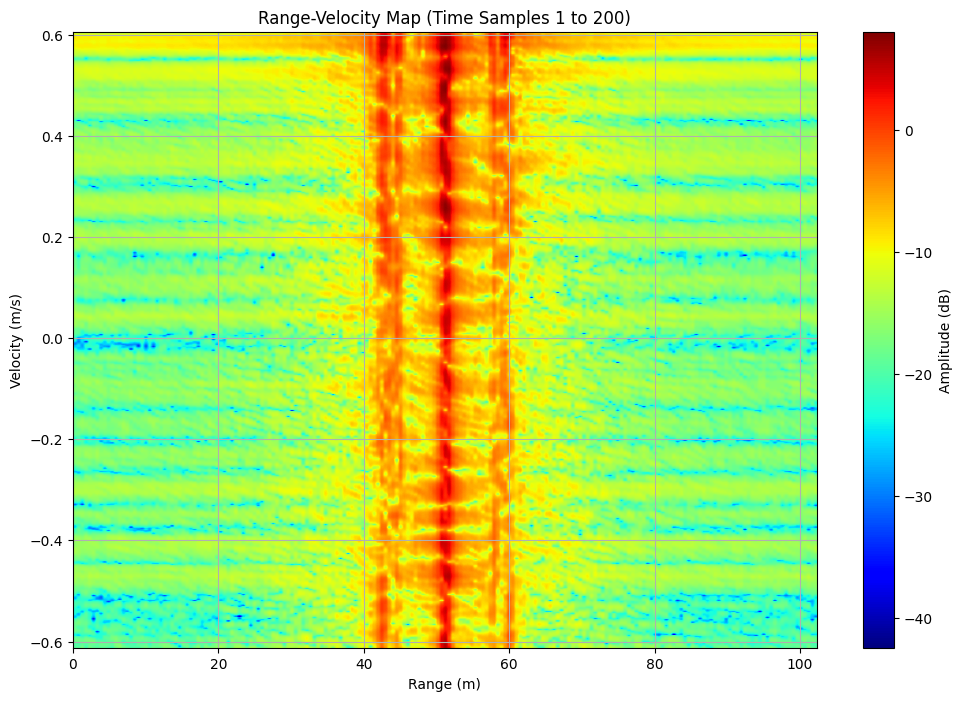

In [113]:
# Define the function to generate Range-Velocity Map (Heatmap) for a specific time window
def plot_range_velocity_map(td_data, start_sample, end_sample, range_resolution=0.199861):
    """
    Plots the Range-Velocity map (heatmap) for a specific time window from the radar data.
    
    Parameters:
    td_data (numpy array): 3D array of shape (time_samples, range_bins, signals), e.g., (224, 1024, 4).
    start_sample (int): Start index of the time window (chirps).
    end_sample (int): End index of the time window (chirps).
    range_resolution (float): Resolution in meters (default is 0.199861 meters).
    
    Returns:
    None: Displays the Range-Velocity heatmap.
    """
    Nr = td_data.shape[1]  # Range FFT size (based on the number of range bins, 1024)
    Nd = end_sample - start_sample  # Doppler FFT size for the selected time window
    
    # Calculate wavelength
    lambda_radar = c / f_c
    
    # Extract the I1 signal (index 0 in the last dimension)
    Mix = td_data[start_sample:end_sample, :, 0]  # Shape is (Nd, Nr)
    
    # Remove DC offset from the selected time window
    Mix_dc_removed = Mix - np.mean(Mix, axis=0)
    
    # Apply Hanning window to reduce spectral leakage
    window = np.hanning(Nr)  # Apply window for the range FFT size (1024)
    Mix_windowed = Mix_dc_removed * window[np.newaxis, :]  # Broadcasting the window
    
    # Perform 1D FFT along the range bins (Nr)
    FFT1 = np.fft.fft(Mix_windowed, Nr, axis=1)
    FFT1 = np.abs(FFT1)
    FFT1_Norm = FFT1 / np.max(FFT1)  # Normalize the FFT result
    
    # Perform 2D FFT using Nr for range and Nd for Doppler
    sig_fft2 = np.fft.fft2(Mix_windowed, [Nr, Nd])
    sig_fft2 = np.fft.fftshift(sig_fft2)  # Shift the FFT for better visualization
    RDM = np.abs(sig_fft2)
    RDM = 10 * np.log10(RDM)  # Convert to log scale (dB)
    
    # Define Range and Velocity axes
    max_range = range_resolution * Nr  # Maximum range from FFT
    range_axis = np.linspace(0, max_range/2, Nr//2)  # Take the first half of the range FFT
    
    # Doppler velocity calculation from Doppler frequency
    doppler_axis = np.linspace(-Nd/2, Nd/2-1, Nd)  # Doppler frequency bins
    velocity_axis = (doppler_axis * lambda_radar) / 2  # Convert Doppler frequency to velocity
    
    # Plot the Range-Velocity Map as a heatmap
    plt.figure(figsize=(12, 8))
    plt.imshow(RDM[:Nr//2, :], aspect='auto', extent=[range_axis[0], range_axis[-1], velocity_axis[0], velocity_axis[-1]], origin='lower', cmap='jet')
    plt.colorbar(label='Amplitude (dB)')
    
    plt.title(f'Range-Velocity Map (Time Samples {start_sample} to {end_sample})')
    plt.xlabel('Range (m)')
    plt.ylabel('Velocity (m/s)')
    plt.grid(True)
    plt.show()

# Example usage:
plot_range_velocity_map(td_data, start_sample=1, end_sample=200)

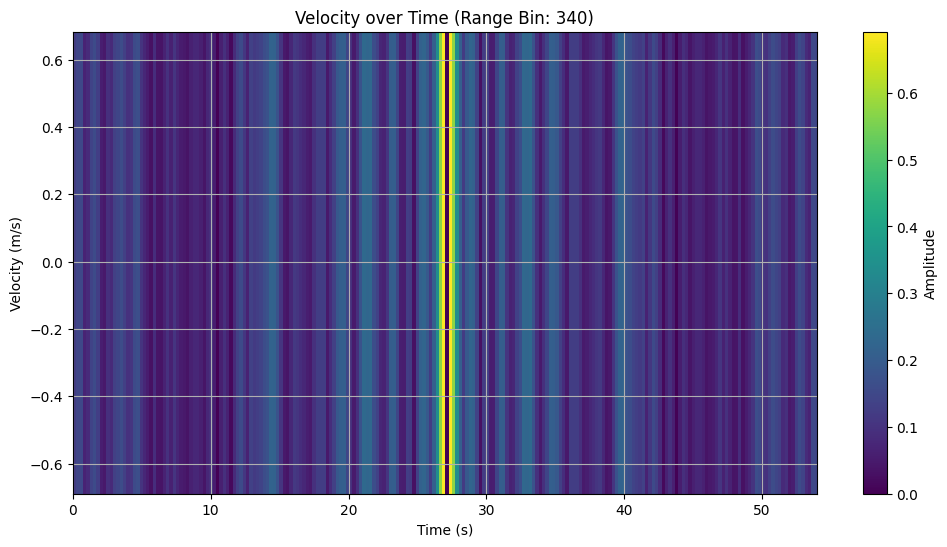

In [114]:
import numpy as np
import matplotlib.pyplot as plt

def plot_velocity_over_time_heatmap(td_data, range_bin, f_c=24.375e9, time_step=0.1, range_resolution=0.199861):
    """
    Plots velocity over time for a specific range bin from radar data using a heatmap.
    
    Parameters:
    td_data (numpy array): 3D array of shape (time_samples, range_bins, signals), e.g., (224, 1024, 4).
    range_bin (int): The range bin for which to plot velocity over time.
    f_c (float): Central frequency of the radar (Hz).
    time_step (float): Time between chirps (s), default is 0.1 seconds.
    range_resolution (float): Resolution in meters (default is 0.199861 meters).
    
    Returns:
    None: Displays the velocity over time heatmap.
    """
    c = 3e8  # Speed of light in m/s
    Nr = td_data.shape[1]  # Number of range bins
    Nd = td_data.shape[0]  # Number of time samples
    
    # Calculate wavelength
    lambda_radar = c / f_c
    
    # Extract the I1 signal (index 0 in the last dimension)
    Mix = td_data[:, :, 0]  # Shape is (Nd, Nr)
    
    # Remove DC offset
    Mix_dc_removed = Mix - np.mean(Mix, axis=0)
    
    # Apply Hanning window
    window = np.hanning(Nr)
    Mix_windowed = Mix_dc_removed * window[np.newaxis, :]
    
    # Perform 2D FFT to get the Doppler shifts over time for the specified range bin
    FFT2 = np.fft.fftshift(np.fft.fft(Mix_windowed, axis=0), axes=0)
    Doppler_data = np.abs(FFT2[:, range_bin])
    
    # Doppler velocity calculation
    doppler_bins = np.linspace(-Nd/2, Nd/2-1, Nd)  # Doppler frequency bins
    velocity = (doppler_bins * lambda_radar) / 2  # Convert Doppler frequency to velocity
    
    # Time axis
    time_axis = np.linspace(0, Nd * time_step, Nd)  # Time in seconds
    
    # Plot velocity over time using a heatmap
    plt.figure(figsize=(12, 6))
    plt.imshow(Doppler_data[:, np.newaxis].T, aspect='auto', extent=[time_axis[0], time_axis[-1], velocity[0], velocity[-1]], cmap='viridis', origin='lower')
    plt.colorbar(label='Amplitude')
    
    plt.title(f'Velocity over Time (Range Bin: {range_bin})')
    plt.xlabel('Time (s)')
    plt.ylabel('Velocity (m/s)')
    plt.grid(True)
    plt.show()

# Example usage:
plot_velocity_over_time_heatmap(td_data, range_bin=340, time_step=TIME_STEP)



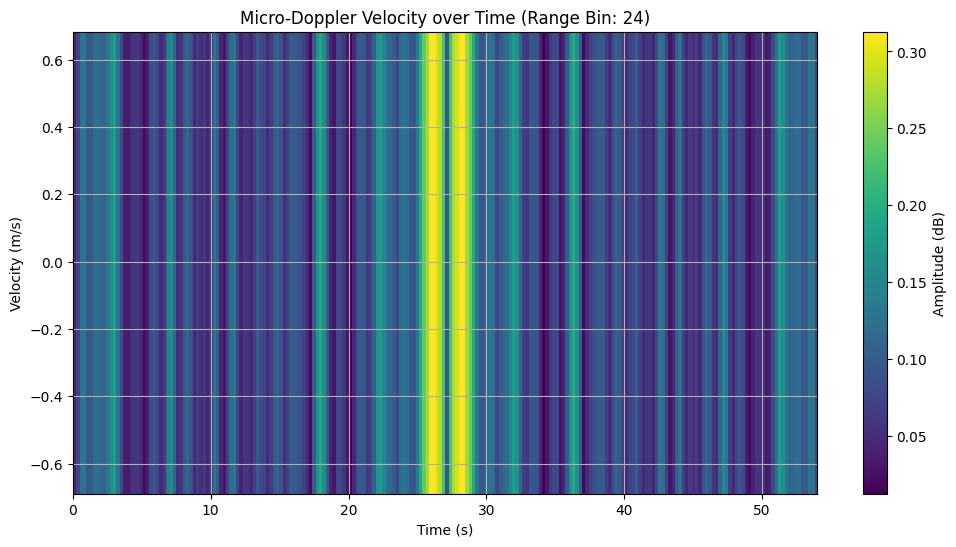

In [115]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

def plot_microdoppler_velocity_over_time(td_data, f_c=24.375e9, time_step=0.1, range_bin=200, range_resolution=0.199861):
    """
    Plots micro-Doppler velocity over time for a specific range bin from radar data using a heatmap.
    
    Parameters:
    td_data (numpy array): 3D array of shape (time_samples, range_bins, signals), e.g., (224, 1024, 4).
    f_c (float): Central frequency of the radar (Hz).
    time_step (float): Time between chirps (s), default is 0.1 seconds.
    range_bin (int): The range bin for which to plot micro-Doppler velocity over time.
    range_resolution (float): Resolution in meters (default is 0.199861 meters).
    
    Returns:
    None: Displays the micro-Doppler velocity over time heatmap.
    """
    c = 3e8  # Speed of light in m/s
    Nr = td_data.shape[1]  # Number of range bins
    Nd = td_data.shape[0]  # Number of time samples (chirps)
    
    # Calculate wavelength
    lambda_radar = c / f_c
    
    # Extract the I1 signal (index 0 in the last dimension) for the specific range bin
    Mix = td_data[:, :, 0]  # Shape is (Nd, Nr)
    
    # Remove DC offset
    Mix_dc_removed = Mix - np.mean(Mix, axis=0)
    
    # Apply Hanning window to reduce spectral leakage and enhance fine Doppler effects
    window = np.hanning(Nd)
    Mix_windowed = Mix_dc_removed * window[:, np.newaxis]
    
    # Perform FFT along the time axis (Doppler processing) for the specific range bin
    FFT2 = np.fft.fftshift(np.fft.fft(Mix_windowed, axis=0), axes=0)
    Doppler_data = np.abs(FFT2[:, range_bin])
    
    # Doppler velocity calculation
    doppler_bins = np.linspace(-Nd/2, Nd/2-1, Nd)  # Doppler frequency bins
    velocity = (doppler_bins * lambda_radar) / 2  # Convert Doppler frequency to velocity
    
    # Time axis
    time_axis = np.linspace(0, Nd * time_step, Nd)  # Time in seconds
    
    # Plot micro-Doppler velocity over time using a heatmap
    plt.figure(figsize=(12, 6))
    plt.imshow(Doppler_data[:, np.newaxis].T, aspect='auto', extent=[time_axis[0], time_axis[-1], velocity[0], velocity[-1]], cmap='viridis', origin='lower')
    plt.colorbar(label='Amplitude (dB)')
    
    plt.title(f'Micro-Doppler Velocity over Time (Range Bin: {range_bin})')
    plt.xlabel('Time (s)')
    plt.ylabel('Velocity (m/s)')
    plt.grid(True)
    plt.show()

# Example usage:
plot_microdoppler_velocity_over_time(td_data, range_bin=24, time_step=TIME_STEP)


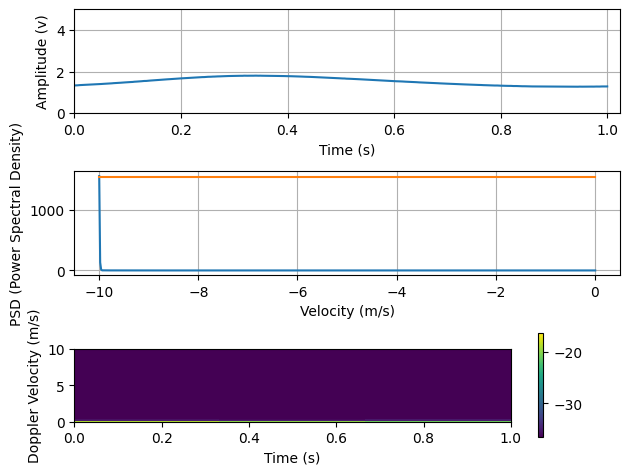

In [161]:
import numpy as np
import matplotlib.pyplot as plt
from time import time

# Assuming radar attributes (replace with actual values or dynamically set)
class RadarConfig:
    def __init__(self):
        self.fs = 1000  # Sampling frequency in Hz
        self.N = 1024   # Number of samples (data length)
        self.STFT_nfft = 512  # FFT size for STFT
        self.STFT_no_overlap = 256  # Overlap for STFT
        self.STFT_zero_padding = 128  # Zero padding
        self.T = 1.0  # Total observation time (seconds)
        self.ts = self.T / self.N  # Time step
        self.lamb = WAVELENGTH  # Radar wavelength (example)
        self.max_doppler = 10  # Maximum Doppler shift
        self.doppler_resolution = self.max_doppler / self.STFT_nfft
        self.vel_axis = np.linspace(-self.max_doppler, self.max_doppler, self.N)  # Doppler velocity axis
        self.time_axis = np.linspace(0, self.T, self.N)  # Time axis

radar = RadarConfig()


# Define your custom STFT function
def stft(buf, nfft, overlap, zp, w):
    N = len(buf)  # Total number of time samples in the buffer
    n = nfft - overlap  # Number of non-overlapping samples
    samp_idx = range(0, N - nfft + n, n)  # Starting indices for FFT
    t = len(samp_idx)  # Number of windows
    if (nfft + zp) % 2 == 0:
        out = np.zeros([t, int((nfft + zp) / 2 + 1)])
    else:
        out = np.zeros([t, int((nfft + zp + 1) / 2)])
    
    for ctr, i in enumerate(samp_idx):
        samp = buf[i:i + nfft] - np.mean(buf[i:i + nfft])  # Remove DC component
        samp = np.multiply(w, samp)  # Apply window
        line = np.fft.rfft(samp / N, n=nfft + zp)  # Compute FFT with zero padding
        out[ctr] = np.abs(line)  # Magnitude spectrum
    return out.T

# Plot the results
def plot_radar_data(buf, radar):
    # Time-domain signal plot
    plt.subplot(311)
    plt.plot(radar.time_axis, np.array(buf[0:radar.N]))
    plt.grid(True)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude (v)')
    plt.ylim([0, 5])  # Assuming your signal is between 0-5 V, adjust as needed
    plt.xlim([0, radar.N * (1 / radar.fs)])

    # DFT plot (Velocity vs Power Spectral Density)
    plt.subplot(312)
    yf = np.abs(np.fft.rfft(buf[0:radar.N]))  # Simple DFT for PSD plot
    plt.plot(radar.vel_axis[:len(yf)], yf)
    maxp = np.max(yf)
    plt.plot(radar.vel_axis[:len(yf)], (maxp - 20) * np.ones(len(yf)))
    plt.grid(True)
    plt.xlabel("Velocity (m/s)")
    plt.ylabel("PSD (Power Spectral Density)")

    # STFT plot
    plt.subplot(313)
    yf = stft(buf[0:radar.N], radar.STFT_nfft, radar.STFT_no_overlap,
              radar.STFT_zero_padding, np.hamming(radar.STFT_nfft))
    yf = 10 * np.log10(yf)  # Convert to dB scale
    maxp = np.max(yf)
    
    c = plt.imshow(yf, vmin=maxp - 20, vmax=maxp, origin="lower", interpolation='nearest',
                   extent=[0, radar.T, 0, radar.max_doppler], aspect=radar.ts / (3 * radar.doppler_resolution))
    plt.colorbar(c)
    plt.xlabel('Time (s)')
    plt.ylabel('Doppler Velocity (m/s)')

    plt.tight_layout()
    plt.show()

# Example usage
plot_radar_data(td_data[3,:,0], radar)

In [156]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming radar configuration and data
class RadarConfig:
    def __init__(self, num_time_samples):
        self.fs = 1 / 0.245  # Sampling frequency in Hz (0.245 seconds per sample)
        self.N = 1024  # Number of voltage samples per time index
        self.STFT_nfft = 512  # FFT size for STFT
        self.STFT_no_overlap = 256  # Overlap for STFT
        self.STFT_zero_padding = 128  # Zero padding
        self.T = num_time_samples * 0.245  # Total observation time
        self.ts = 0.245  # Time step per sample
        self.lamb = 0.03  # Radar wavelength (example value)
        self.max_doppler = 10  # Maximum Doppler shift (adjust based on radar configuration)
        self.doppler_resolution = self.max_doppler / self.STFT_nfft
        self.vel_axis = np.linspace(-self.max_doppler, self.max_doppler, self.STFT_nfft//2+1)  # Doppler velocity axis
        self.time_axis = np.linspace(0, self.T, num_time_samples)  # Time axis based on number of time samples

# Define your custom STFT function
def stft(buf, nfft, overlap, zp, w):
    N = len(buf)  # Total number of time samples in the buffer
    n = nfft - overlap  # Number of non-overlapping samples
    samp_idx = range(0, N - nfft + n, n)  # Starting indices for FFT
    t = len(samp_idx)  # Number of windows
    if (nfft + zp) % 2 == 0:
        out = np.zeros([t, int((nfft + zp) / 2 + 1)])
    else:
        out = np.zeros([t, int((nfft + zp + 1) / 2)])
    
    for ctr, i in enumerate(samp_idx):
        samp = buf[i:i + nfft] - np.mean(buf[i:i + nfft])  # Remove DC component
        samp = np.multiply(w, samp)  # Apply window
        line = np.fft.rfft(samp / N, n=nfft + zp)  # Compute FFT with zero padding
        out[ctr] = np.abs(line)  # Magnitude spectrum
    return out.T

# Plotting Doppler velocity over time for all time samples (generalized for variable time samples)
def plot_doppler_velocity(buf, radar):
    num_time_samples = buf.shape[0]  # Dynamically get the number of time samples

    # Time-domain signal plot for the first sample index
    plt.subplot(311)
    plt.plot(np.linspace(0, radar.T, radar.N), buf[0])
    plt.grid(True)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude (v)')
    plt.xlim([0, radar.N * (1 / radar.fs)])

    # STFT over all time samples
    all_stft = []

    for i in range(num_time_samples):
        # Compute the STFT for each time sample
        yf = stft(buf[i], radar.STFT_nfft, radar.STFT_no_overlap, radar.STFT_zero_padding, np.hamming(radar.STFT_nfft))
        yf = 10 * np.log10(yf)  # Convert to dB scale
        all_stft.append(yf)

    # Convert list to numpy array (shape: [num_time_samples, frequency_bins, time_segments])
    all_stft = np.array(all_stft)

    # Average over all the samples
    avg_stft = np.mean(all_stft, axis=0)

    # Plot the averaged STFT results over time and Doppler velocity
    plt.subplot(312)
    maxp = np.max(avg_stft)
    c = plt.imshow(avg_stft, vmin=maxp - 20, vmax=maxp, origin="lower", interpolation='nearest',
                   extent=[0, radar.T, -radar.max_doppler, radar.max_doppler], aspect='auto')
    plt.colorbar(c)
    plt.xlabel('Time (s)')
    plt.ylabel('Doppler Velocity (m/s)')
    
    plt.tight_layout()
    plt.show()

# Example usage with dynamic number of time samples
radar = RadarConfig(num_time_samples=td_data.shape[0])
plot_doppler_velocity(td_data[:,:,0], radar)

(224, 1024)
(64,) (33,) (64, 224, 33)


/tmp/ipykernel_21812/2438786304.py:14: UserWarning: Input data is complex, switching to return_onesided=False
  f_S1, t_S1, Zxx_S1 = stft(S1.T, fs=1/(0.245), nperseg=64, noverlap=32, axis=0)
/tmp/ipykernel_21812/2438786304.py:15: UserWarning: Input data is complex, switching to return_onesided=False
  f_S2, t_S2, Zxx_S2 = stft(S2.T, fs=1/(0.245), nperseg=64, noverlap=32, axis=0)


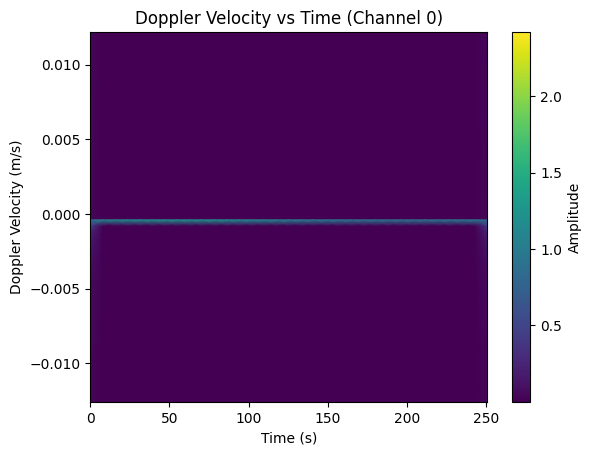

In [178]:
from scipy.signal import stft
import numpy as np
import matplotlib.pyplot as plt

# Assuming td_data is your (224, 1024, 4) array:
I1, Q1, I2, Q2 = td_data[:, :, 0], td_data[:, :, 1], td_data[:, :, 2], td_data[:, :, 3]

# Create complex signals for both receivers
S1 = I1 + 1j * Q1  # Shape (224, 1024)
S2 = I2 + 1j * Q2  # Shape (224, 1024)
print(S2.shape)

# Perform STFT along the time axis (axis=0)
f_S1, t_S1, Zxx_S1 = stft(S1.T, fs=1/(0.245), nperseg=64, noverlap=32, axis=0)
f_S2, t_S2, Zxx_S2 = stft(S2.T, fs=1/(0.245), nperseg=64, noverlap=32, axis=0)

print(f_S1.shape, t_S1.shape, Zxx_S1.shape)

# Plot for a specific channel (e.g., channel 0)
Zxx_S1_channel0 = Zxx_S1[:, 202, :]  # Shape (64, 33)

# Compute Doppler velocities from frequency bins (f_S1 is in Hz)
doppler_velocity_S1 = (3e8 * f_S1) / (2 * 24375e6)

# Ensure the dimensions match for plotting
plt.pcolormesh(t_S1, doppler_velocity_S1, np.abs(Zxx_S1_channel0), shading='gouraud')

plt.ylabel('Doppler Velocity (m/s)')
plt.xlabel('Time (s)')
plt.title('Doppler Velocity vs Time (Channel 0)')
plt.colorbar(label='Amplitude')
plt.show()





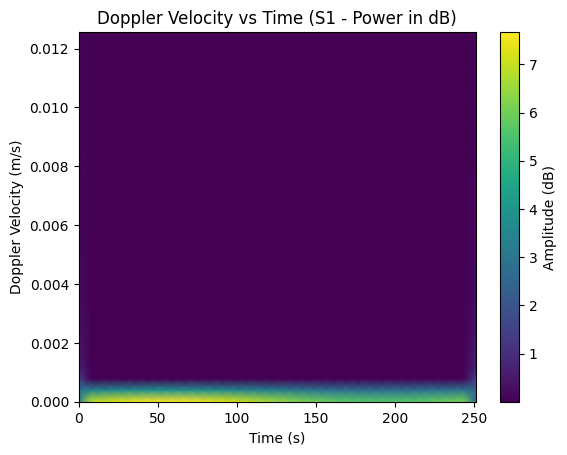

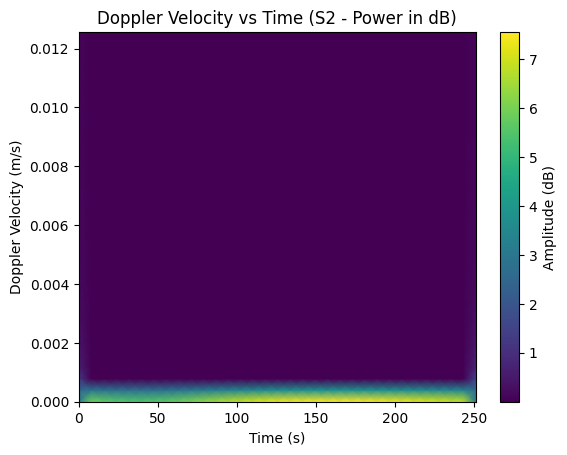

In [183]:
from scipy.signal import stft
import numpy as np
import matplotlib.pyplot as plt

# Assuming td_data is your (224, 1024, 4) array:
I1, Q1, I2, Q2 = td_data[:, :, 0], td_data[:, :, 1], td_data[:, :, 2], td_data[:, :, 3]

# Step 1: Convert voltages to power (I^2 + Q^2)
power_S1 = I1**2 + Q1**2  # Power for the first receiver (Shape: 224, 1024)
power_S2 = I2**2 + Q2**2  # Power for the second receiver (Shape: 224, 1024)

# Step 2 (optional): Convert power to dB
power_S1_dB = 10 * np.log10(power_S1 + 1e-10)  # Add a small value to avoid log(0)
power_S2_dB = 10 * np.log10(power_S2 + 1e-10)

# Step 3: Perform STFT on the power data along the time axis (using dB or power as preferred)
# Here, we use the dB representation, but you could use `power_S1` directly if you prefer power.
f_S1, t_S1, Zxx_S1 = stft(power_S1_dB.T, fs=1/(0.245), nperseg=64, noverlap=32, axis=0)
f_S2, t_S2, Zxx_S2 = stft(power_S2_dB.T, fs=1/(0.245), nperseg=64, noverlap=32, axis=0)

Zxx_S1_channel0 = Zxx_S1[:, 0, :]  # Shape (64, 33)
Zxx_S2_channel0 = Zxx_S2[:, 0, :]  # Shape (64, 33)

# Step 4: Compute Doppler velocities from frequency bins (f_S1 is in Hz)
doppler_velocity_S1 = (3e8 * f_S1) / (2 * 24375e6)  # Convert frequency to velocity
doppler_velocity_S2 = (3e8 * f_S2) / (2 * 24375e6)

# Step 5: Plot the heatmap for the first receiver (S1)
plt.pcolormesh(t_S1, doppler_velocity_S1, np.abs(Zxx_S1_channel0), shading='gouraud')
plt.ylabel('Doppler Velocity (m/s)')
plt.xlabel('Time (s)')
plt.title('Doppler Velocity vs Time (S1 - Power in dB)')
plt.colorbar(label='Amplitude (dB)')
plt.show()

# Step 6 (optional): Plot for the second receiver (S2)
plt.pcolormesh(t_S2, doppler_velocity_S2, np.abs(Zxx_S2_channel0), shading='gouraud')
plt.ylabel('Doppler Velocity (m/s)')
plt.xlabel('Time (s)')
plt.title('Doppler Velocity vs Time (S2 - Power in dB)')
plt.colorbar(label='Amplitude (dB)')
plt.show()


/tmp/ipykernel_21812/3153929370.py:40: UserWarning: Input data is complex, switching to return_onesided=False
  f_S1, t_S1, Zxx_S1 = stft(S1, fs=1/(0.245), nperseg=64, noverlap=32, axis=-1)


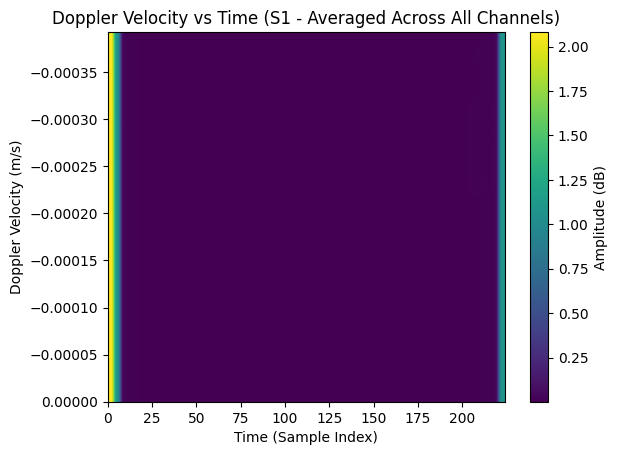

In [203]:
from scipy.signal import stft
import numpy as np
import matplotlib.pyplot as plt


def ampl_db(signal_index):
    # Extract the I1 signal (first signal in the last dimension)
    I1_signal = td_data[:, :, signal_index]  # Shape is (Nd, Nr)
    
    # Apply Hanning window to reduce spectral leakage
    window = np.hanning(Nr)
    I1_signal_windowed = I1_signal * window[np.newaxis, :]
    
    # Perform FFT along the range bins
    I1_fft = np.fft.fft(I1_signal_windowed, axis=1)
    
    # Take the magnitude of the first half of the FFT results
    I1_amplitude = np.abs(I1_fft[:, :Nr//2])
    
    # Convert to dB scale
    I1_amplitude_db = 20 * np.log10(I1_amplitude)
    return I1_amplitude_db
    

# Assuming td_data is your (224, 1024, 4) array:
I1, Q1, I2, Q2 = td_data[:, :, 0], td_data[:, :, 1], td_data[:, :, 2], td_data[:, :, 3]


from scipy.signal import stft
import numpy as np
import matplotlib.pyplot as plt

# Assuming td_data is your (224, 1024, 4) array, and I1, Q1, I2, Q2 are already in dB:
I1, Q1, I2, Q2 = td_data[:, :, 0], td_data[:, :, 1], td_data[:, :, 2], td_data[:, :, 3]

# Step 1: Create complex signal for a single receiver, e.g., S1
S1 = I1 + 1j * Q1  # Complex signal from first receiver (S1)

# Step 2: Perform STFT on the complex signal across all time channels (axis=-1 for voltage)
f_S1, t_S1, Zxx_S1 = stft(S1, fs=1/(0.245), nperseg=64, noverlap=32, axis=-1)

# Step 3: Compute Doppler velocities from frequency bins (f_S1 is in Hz)
doppler_velocity_S1 = (3e8 * f_S1) / (2 * 24375e6)  # Convert frequency to velocity

# Step 4: Plot the heatmap for the first receiver (S1) across all time channels
plt.imshow(np.abs(Zxx_S1[:, :, :]).mean(axis=2), aspect='auto', origin='lower',
           extent=[0, 224, doppler_velocity_S1[0], doppler_velocity_S1[-1]])
plt.colorbar(label='Amplitude (dB)')
plt.ylabel('Doppler Velocity (m/s)')
plt.xlabel('Time (Sample Index)')
plt.title('Doppler Velocity vs Time (S1 - Averaged Across All Channels)')
plt.show()

(2302, 1024) (2302, 1024) (2302, 1024) (2302, 1024)


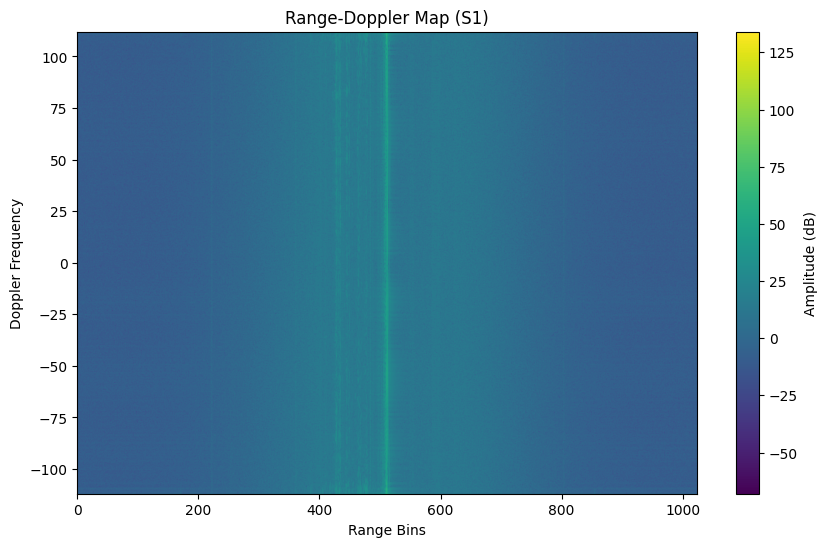

In [266]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftshift

# Assuming td_data is your (224, 1024, 4) array:
def ampl_db(signal_index):
    # Extract the I1 signal (first signal in the last dimension)
    I1_signal = td_data[:, :, signal_index]  # Shape is (Nd, Nr)
    
    # Apply Hanning window to reduce spectral leakage
    window = np.hanning(Nr)
    I1_signal_windowed = I1_signal * window[np.newaxis, :]
    
    # Perform FFT along the range bins
    I1_fft = np.fft.fft(I1_signal_windowed, axis=1)
    
    # Take the magnitude of the first half of the FFT results
    I1_amplitude = np.abs(I1_fft[:, :Nr//2])
    
    # Convert to dB scale
    I1_amplitude_db = 20 * np.log10(I1_amplitude)
    return I1_amplitude_db
    

# Assuming td_data is your (224, 1024, 4) array:
I1, Q1, I2, Q2 = td_data[:, :, 0], td_data[:, :, 1], td_data[:, :, 2], td_data[:, :, 3]
print(I1.shape, Q1.shape, I2.shape, Q2.shape)

# Step 1: Combine I and Q to form complex signals
S1 = I1 + 1j * Q1  # First receiver complex signal
S2 = I2 + 1j * Q2  # Second receiver complex signal

# Step 2: Perform FFT along the range bins (axis=1, 1024 samples per chirp)
range_fft_S1 = fft(S1, axis=1)
range_fft_S2 = fft(S2, axis=1)

# Step 3: Shift zero-frequency component to the center of the spectrum
range_fft_S1_shifted = fftshift(range_fft_S1, axes=1)
range_fft_S2_shifted = fftshift(range_fft_S2, axes=1)

# Step 4: Perform FFT across the chirps (Doppler FFT, axis=0)
doppler_fft_S1 = fft(range_fft_S1_shifted, axis=0)
doppler_fft_S2 = fft(range_fft_S2_shifted, axis=0)

# Step 5: Convert to dB scale for better visualization
RDM_S1 = 20 * np.log10(np.abs(doppler_fft_S1) + 1e-6)  # Add small value to avoid log(0)
RDM_S2 = 20 * np.log10(np.abs(doppler_fft_S2) + 1e-6)

# Step 6: Plot the Range-Doppler Map for S1
plt.figure(figsize=(10, 6))
plt.imshow(RDM_S1, aspect='auto', extent=[0, 1024, -112, 112], cmap='viridis')
plt.colorbar(label='Amplitude (dB)')
plt.xlabel('Range Bins')
plt.ylabel('Doppler Frequency')
plt.title('Range-Doppler Map (S1)')
plt.show()

# Repeat for S2 or further processing as needed.


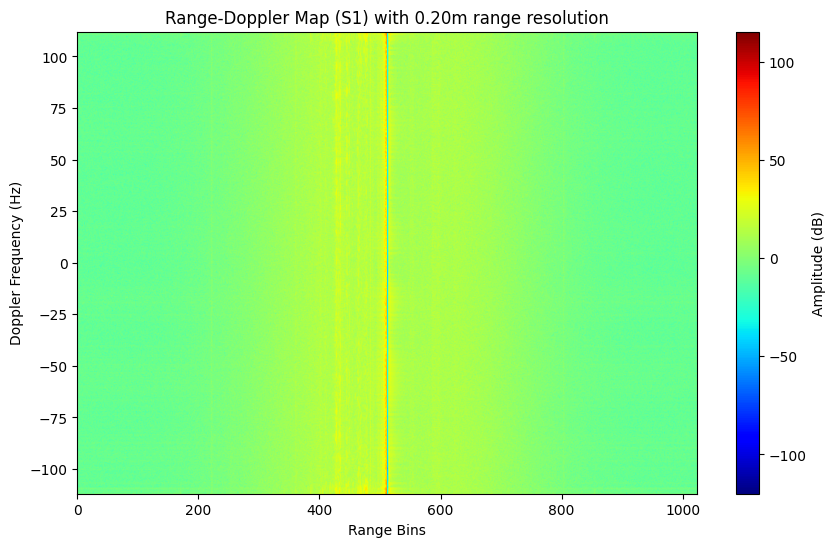

In [274]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftshift

# Tunable Radar Configuration Parameters
start_freq = 24e9        # Start frequency in Hz (24 GHz)
stop_freq = 24.75e9      # Stop frequency in Hz (24.75 GHz)
ramp_time = 1e-3         # Ramp time in seconds (1 ms)
num_samples = 1024       # Number of ADC samples per chirp
num_chirps = 224         # Number of chirps (time samples)
bin_size_mm = 199.861    # Range bin size in mm
bin_size_hz = 1017       # Frequency bin size in Hz
sampling_rate = 1e6      # Sampling rate in Hz (1 MHz)
range_resolution = bin_size_mm / 1e3  # Range resolution in meters
doppler_bin_size = 1 / (num_chirps * ramp_time)  # Doppler bin size in Hz

# ADC Data (time samples, range bins, signals) in shape (224, 1024, 4)
# Assuming td_data is your (224, 1024, 4) array:
I1, Q1, I2, Q2 = td_data[:, :, 0], td_data[:, :, 1], td_data[:, :, 2], td_data[:, :, 3]

# Step 1: Combine I and Q to form complex signals
S1 = I1 + 1j * Q1  # First receiver complex signal
S2 = I2 + 1j * Q2  # Second receiver complex signal

S1_dc_removed = S1 - np.mean(S1, axis=1, keepdims=True)
S2_dc_removed = S2 - np.mean(S2, axis=1, keepdims=True)

# Step 2: Perform FFT along the range bins (axis=1, 1024 samples per chirp)
range_fft_S1 = fft(S1_dc_removed, axis=1)
range_fft_S2 = fft(S2_dc_removed, axis=1)

# Step 3: Shift zero-frequency component to the center of the spectrum
range_fft_S1_shifted = fftshift(range_fft_S1, axes=1)
range_fft_S2_shifted = fftshift(range_fft_S2, axes=1)

# Step 4: Perform FFT across the chirps (Doppler FFT, axis=0)
doppler_fft_S1 = fft(range_fft_S1_shifted, axis=0)
doppler_fft_S2 = fft(range_fft_S2_shifted, axis=0)

# Step 5: Convert to dB scale for better visualization
RDM_S1 = 20 * np.log10(np.abs(doppler_fft_S1) + 1e-6)  # Add small value to avoid log(0)
RDM_S2 = 20 * np.log10(np.abs(doppler_fft_S2) + 1e-6)

# Step 6: Plot the Range-Doppler Map for S1
plt.figure(figsize=(10, 6))
plt.imshow(RDM_S1, aspect='auto', extent=[0, num_samples, -num_chirps / 2, num_chirps / 2], cmap='jet')
plt.colorbar(label='Amplitude (dB)')
plt.xlabel('Range Bins')
plt.ylabel('Doppler Frequency (Hz)')
plt.title(f'Range-Doppler Map (S1) with {range_resolution:.2f}m range resolution')
plt.show()

# Repeat for S2 or further processing as needed.


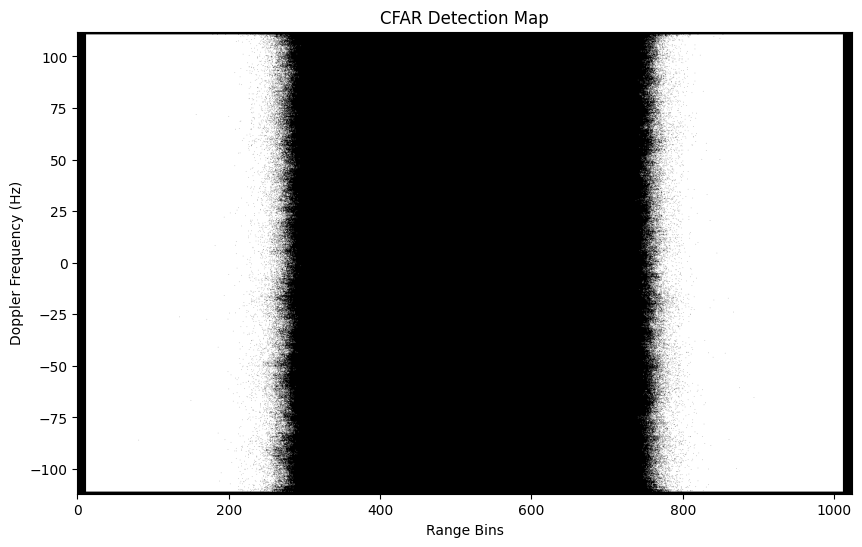

In [275]:
import numpy as np
import matplotlib.pyplot as plt

# CFAR Parameters
num_training_cells = 10  # Number of training cells on each side
num_guard_cells = 2  # Number of guard cells on each side
false_alarm_rate = 1e-3  # Desired probability of false alarm

def apply_CFAR(RDM, num_training_cells, num_guard_cells, false_alarm_rate):
    """
    Applies CFAR to a Range-Doppler map.
    
    Parameters:
    RDM (2D numpy array): The Range-Doppler Map (in dB).
    num_training_cells (int): Number of training cells on each side of the CUT.
    num_guard_cells (int): Number of guard cells on each side of the CUT.
    false_alarm_rate (float): Desired probability of false alarm.
    
    Returns:
    CFAR_output (2D numpy array): The binary map with CFAR detections.
    """
    num_rows, num_cols = RDM.shape
    CFAR_output = np.zeros((num_rows, num_cols))

    # Number of cells for thresholding
    total_training_cells = (2 * num_training_cells + 2 * num_guard_cells + 1) ** 2 - (2 * num_guard_cells + 1) ** 2

    # Set the scaling factor based on the desired false alarm rate
    alpha = total_training_cells * (false_alarm_rate ** (-1 / total_training_cells) - 1)

    # Apply CFAR across the Range-Doppler map
    for row in range(num_training_cells + num_guard_cells, num_rows - num_training_cells - num_guard_cells):
        for col in range(num_training_cells + num_guard_cells, num_cols - num_training_cells - num_guard_cells):
            # Extract the training cells around the cell under test (CUT)
            training_cells = []
            for r in range(row - num_training_cells - num_guard_cells, row + num_training_cells + num_guard_cells + 1):
                for c in range(col - num_training_cells - num_guard_cells, col + num_training_cells + num_guard_cells + 1):
                    # Skip the guard cells and the CUT
                    if abs(r - row) > num_guard_cells or abs(c - col) > num_guard_cells:
                        training_cells.append(RDM[r, c])
            
            # Calculate the noise threshold
            noise_level = np.mean(training_cells)
            threshold = noise_level * alpha

            # Compare CUT to threshold
            if RDM[row, col] > threshold:
                CFAR_output[row, col] = 1  # Detection

    return CFAR_output

# Apply CFAR to the Range-Doppler Map (assuming RDM_S1 is the range-Doppler map in dB)
CFAR_output = apply_CFAR(RDM_S1, num_training_cells, num_guard_cells, false_alarm_rate)

# Plot the CFAR output (binary detections)
plt.figure(figsize=(10, 6))
plt.imshow(CFAR_output, aspect='auto', cmap='gray', extent=[0, 1024, -112, 112])
plt.xlabel('Range Bins')
plt.ylabel('Doppler Frequency (Hz)')
plt.title('CFAR Detection Map')
plt.show()
